In [1559]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle 
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lars, Ridge, Lasso, ElasticNet, BayesianRidge

## Analisis de Datos

### Lectura de Datos

In [1560]:
df = pd.read_csv('datos/train_PAY_AMT3.csv', sep = '|' )

In [1561]:
pd.set_option('display.max_columns',None)
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_4  PAY_5  \
0            2662   180000.0    1          2         2   27     -1     -1   
1           12809    50000.0    1          1         3   45      0      0   
2           25951   250000.0    1          2         1   36      0      0   
3            9209   280000.0    1          1         1   31     -2     -2   
4            5954    50000.0    2          2         3   42      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        23545    20000.0    1          2         1   48     -2     -2   
5621        15967    20000.0    1          2         2   42      0      2   
5622         5993   170000.0    2          1         2   31     -1     -1   
5623         1515   100000.0    2          1         2   29      2      2   
5624        13948    30000.0    1          1         2   42      2      0   

      PAY_6  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT3  PAY_AMT4  \
0        -1      644.0    29944.0      644.0      264.0   29944.0     644.0   
1         0    14388.0    18804.0    23460.0    27870.0    5000.0    5000.0   
2         0   157088.0   136787.0   139385.0   122947.0    5200.0    5500.0   
3        -2     1345.0       -5.0       -5.0      985.0       0.0       0.0   
4         0    50694.0    44858.0    19298.0    19514.0    1572.0    5000.0   
...     ...        ...        ...        ...        ...       ...       ...   
5620     -2        0.0        0.0        0.0        0.0       0.0       0.0   
5621      0    11714.0    13923.0    13405.0    13683.0    2726.0       0.0   
5622     -1     7315.0    10730.0     1686.0     9445.0   10730.0    1686.0   
5623      2    67564.0    67443.0    65106.0    70258.0    2500.0       0.0   
5624      0    31380.0    30277.0    30028.0    30198.0       0.0    1100.0   

      PAY_AMT5  PAY_AMT6  
0        264.0    1024.0  
1       5000.0    5000.0  
2       5000.0    5000.0  
3        990.0    3090.0  
4       1000.0     813.0  
...        ...       ...  
5620       0.0       0.0  
5621     643.0     646.0  
5622    9445.0    3444.0  
5623    6918.0    3520.0  
5624    1050.0    1000.0  

[5625 rows x 17 columns]

In [1562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUSTOMER_ID  5625 non-null   int64  
 1   LIMIT_BAL    5625 non-null   float64
 2   SEX          5625 non-null   int64  
 3   EDUCATION    5625 non-null   int64  
 4   MARRIAGE     5625 non-null   int64  
 5   AGE          5625 non-null   int64  
 6   PAY_4        5625 non-null   int64  
 7   PAY_5        5625 non-null   int64  
 8   PAY_6        5625 non-null   int64  
 9   BILL_AMT3    5625 non-null   float64
 10  BILL_AMT4    5625 non-null   float64
 11  BILL_AMT5    5625 non-null   float64
 12  BILL_AMT6    5625 non-null   float64
 13  PAY_AMT3     5625 non-null   float64
 14  PAY_AMT4     5625 non-null   float64
 15  PAY_AMT5     5625 non-null   float64
 16  PAY_AMT6     5625 non-null   float64
dtypes: float64(9), int64(8)
memory usage: 747.2 KB


In [1563]:
df.describe()

CUSTOMER_ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   5625.000000    5625.000000  5625.000000  5625.000000  5625.000000   
mean   14792.455289  167642.666667     1.588622     1.854222     1.542222   
std     8628.206383  130331.221117     0.492127     0.797005     0.523322   
min       10.000000   10000.000000     1.000000     0.000000     0.000000   
25%     7222.000000   50000.000000     1.000000     1.000000     1.000000   
50%    14742.000000  140000.000000     2.000000     2.000000     2.000000   
75%    22196.000000  240000.000000     2.000000     2.000000     2.000000   
max    29998.000000  760000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_4        PAY_5        PAY_6      BILL_AMT3  \
count  5625.000000  5625.000000  5625.000000  5625.000000    5625.000000   
mean     35.575111    -0.213689    -0.269156    -0.284444   46071.042311   
std       9.213164     1.208607     1.157610     1.180153   67924.291719   
min      21.000000    -2.000000    -2.000000    -2.000000 -157264.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    2417.000000   
50%      34.000000     0.000000     0.000000     0.000000   19690.000000   
75%      42.000000     0.000000     0.000000     0.000000   59024.000000   
max      72.000000     8.000000     8.000000     8.000000  632041.000000   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT3  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    42955.276622   39541.561422   37884.078044    5304.644800   
std     64142.022806   59848.537614   58307.728327   17493.393385   
min    -15000.000000  -37594.000000  -73895.000000       0.000000   
25%      2270.000000    1727.000000    1047.000000     350.000000   
50%     18864.000000   17515.000000   16062.000000    1800.000000   
75%     53682.000000   49264.000000   47869.000000    4584.000000   
max    628699.000000  547880.000000  514975.000000  400972.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  
count    5625.000000    5625.000000    5625.000000  
mean     4672.380089    4534.108978    5407.481778  
std     15377.027533   14408.222644   18516.746575  
min         0.000000       0.000000       0.000000  
25%       257.000000     150.000000      76.000000  
50%      1500.000000    1452.000000    1445.000000  
75%      4000.000000    4000.000000    4000.000000  
max    528897.000000  417990.000000  528666.000000

In [1564]:
df.isnull().sum()

CUSTOMER_ID    0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
dtype: int64

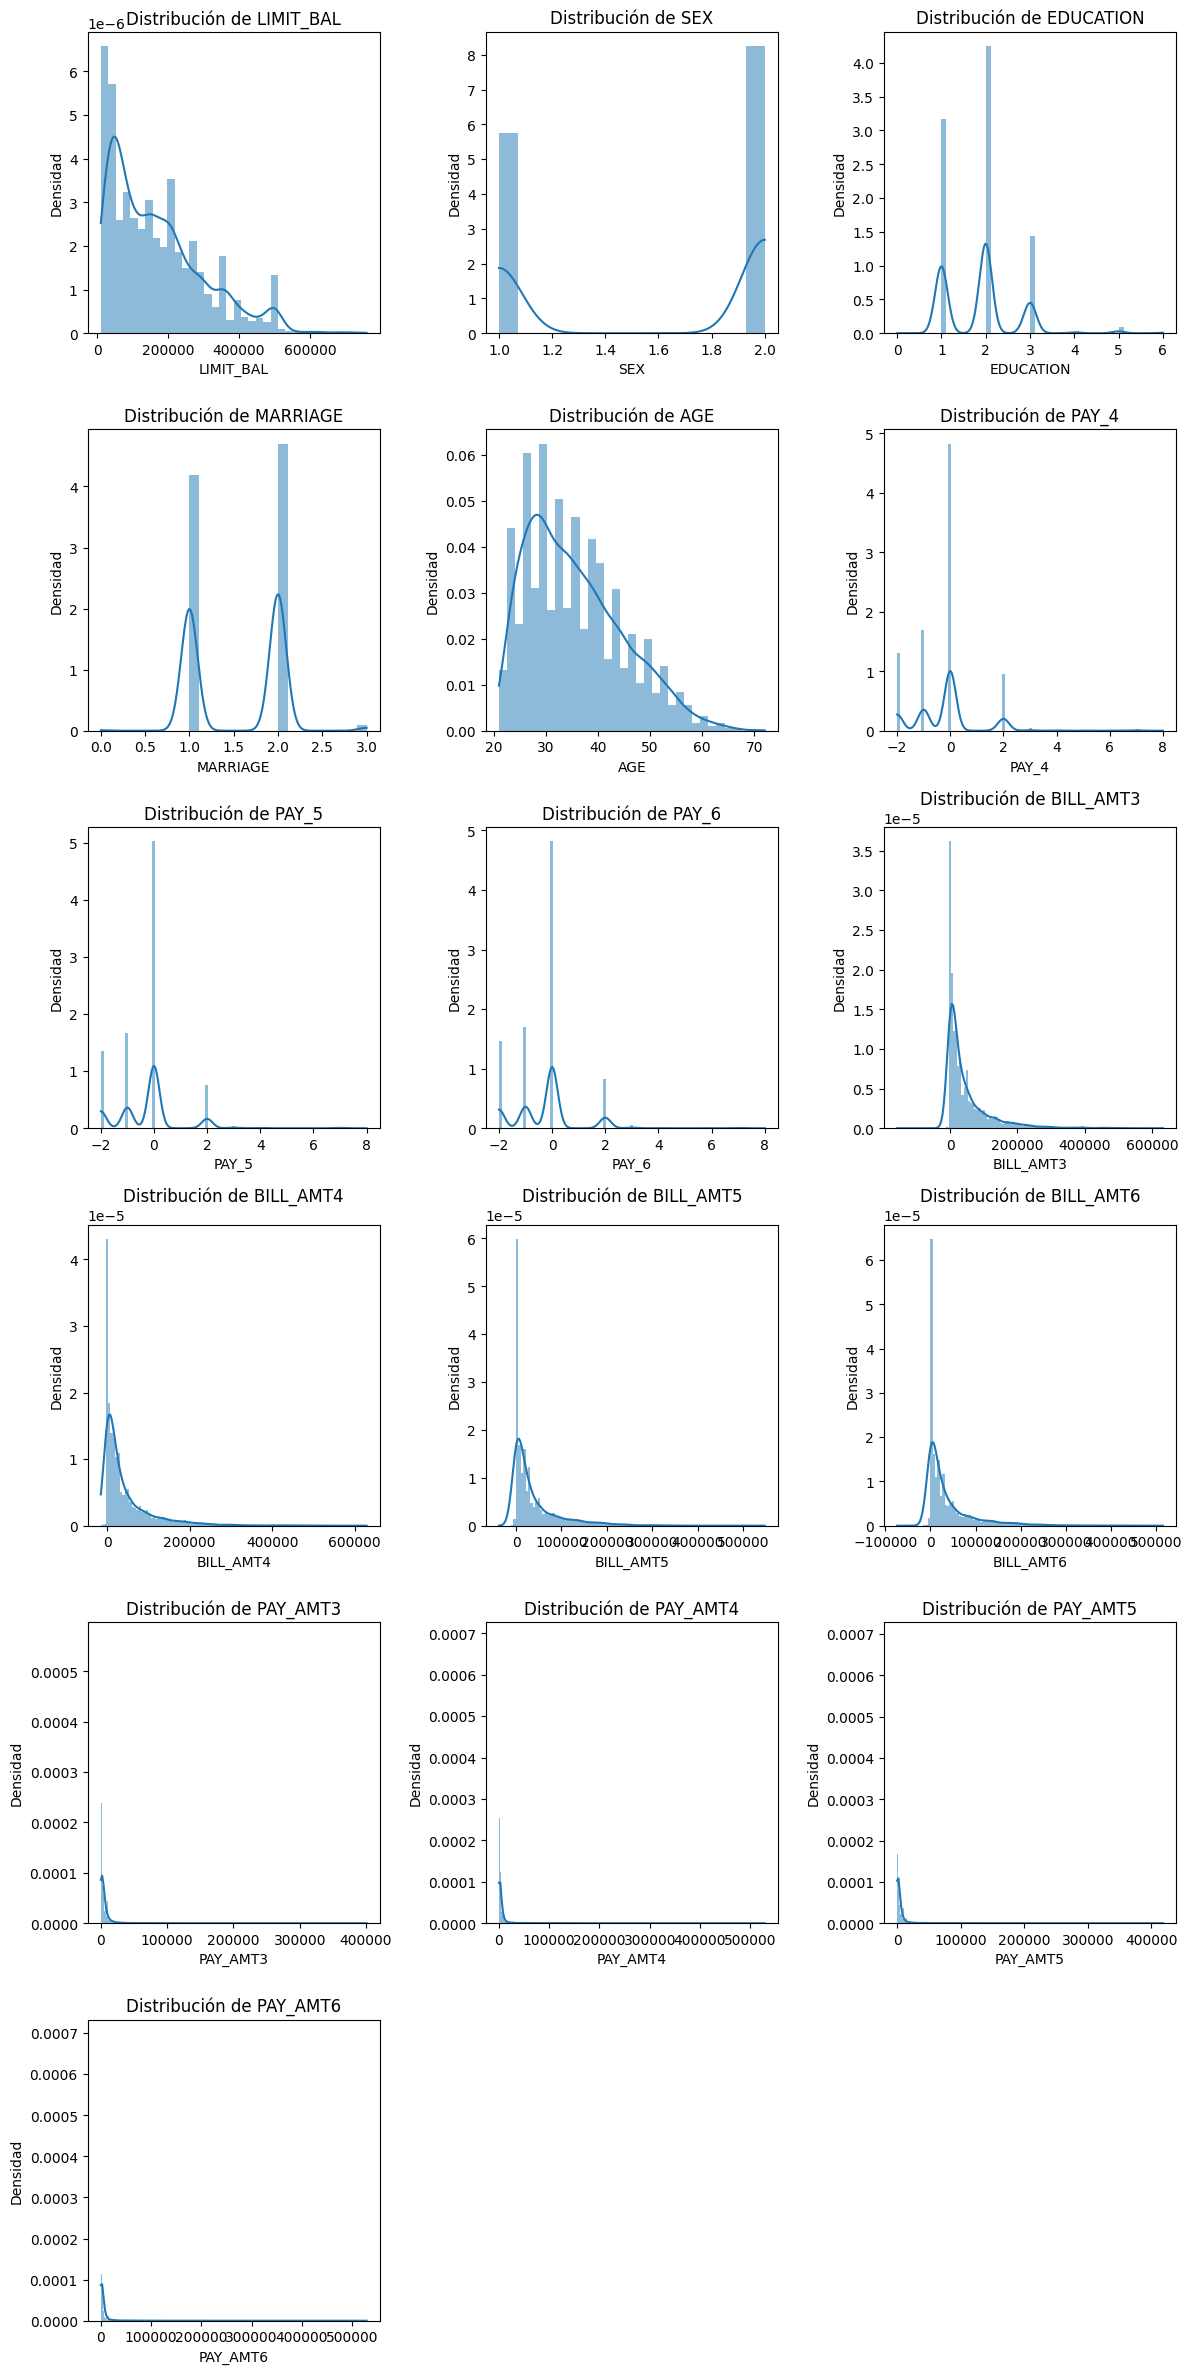

In [1565]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

### Ingenieria de variables

In [1566]:
df.describe()

CUSTOMER_ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   5625.000000    5625.000000  5625.000000  5625.000000  5625.000000   
mean   14792.455289  167642.666667     1.588622     1.854222     1.542222   
std     8628.206383  130331.221117     0.492127     0.797005     0.523322   
min       10.000000   10000.000000     1.000000     0.000000     0.000000   
25%     7222.000000   50000.000000     1.000000     1.000000     1.000000   
50%    14742.000000  140000.000000     2.000000     2.000000     2.000000   
75%    22196.000000  240000.000000     2.000000     2.000000     2.000000   
max    29998.000000  760000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_4        PAY_5        PAY_6      BILL_AMT3  \
count  5625.000000  5625.000000  5625.000000  5625.000000    5625.000000   
mean     35.575111    -0.213689    -0.269156    -0.284444   46071.042311   
std       9.213164     1.208607     1.157610     1.180153   67924.291719   
min      21.000000    -2.000000    -2.000000    -2.000000 -157264.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    2417.000000   
50%      34.000000     0.000000     0.000000     0.000000   19690.000000   
75%      42.000000     0.000000     0.000000     0.000000   59024.000000   
max      72.000000     8.000000     8.000000     8.000000  632041.000000   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT3  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    42955.276622   39541.561422   37884.078044    5304.644800   
std     64142.022806   59848.537614   58307.728327   17493.393385   
min    -15000.000000  -37594.000000  -73895.000000       0.000000   
25%      2270.000000    1727.000000    1047.000000     350.000000   
50%     18864.000000   17515.000000   16062.000000    1800.000000   
75%     53682.000000   49264.000000   47869.000000    4584.000000   
max    628699.000000  547880.000000  514975.000000  400972.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  
count    5625.000000    5625.000000    5625.000000  
mean     4672.380089    4534.108978    5407.481778  
std     15377.027533   14408.222644   18516.746575  
min         0.000000       0.000000       0.000000  
25%       257.000000     150.000000      76.000000  
50%      1500.000000    1452.000000    1445.000000  
75%      4000.000000    4000.000000    4000.000000  
max    528897.000000  417990.000000  528666.000000

In [1567]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_4  PAY_5  \
0            2662   180000.0    1          2         2   27     -1     -1   
1           12809    50000.0    1          1         3   45      0      0   
2           25951   250000.0    1          2         1   36      0      0   
3            9209   280000.0    1          1         1   31     -2     -2   
4            5954    50000.0    2          2         3   42      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        23545    20000.0    1          2         1   48     -2     -2   
5621        15967    20000.0    1          2         2   42      0      2   
5622         5993   170000.0    2          1         2   31     -1     -1   
5623         1515   100000.0    2          1         2   29      2      2   
5624        13948    30000.0    1          1         2   42      2      0   

      PAY_6  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT3  PAY_AMT4  \
0        -1      644.0    29944.0      644.0      264.0   29944.0     644.0   
1         0    14388.0    18804.0    23460.0    27870.0    5000.0    5000.0   
2         0   157088.0   136787.0   139385.0   122947.0    5200.0    5500.0   
3        -2     1345.0       -5.0       -5.0      985.0       0.0       0.0   
4         0    50694.0    44858.0    19298.0    19514.0    1572.0    5000.0   
...     ...        ...        ...        ...        ...       ...       ...   
5620     -2        0.0        0.0        0.0        0.0       0.0       0.0   
5621      0    11714.0    13923.0    13405.0    13683.0    2726.0       0.0   
5622     -1     7315.0    10730.0     1686.0     9445.0   10730.0    1686.0   
5623      2    67564.0    67443.0    65106.0    70258.0    2500.0       0.0   
5624      0    31380.0    30277.0    30028.0    30198.0       0.0    1100.0   

      PAY_AMT5  PAY_AMT6  
0        264.0    1024.0  
1       5000.0    5000.0  
2       5000.0    5000.0  
3        990.0    3090.0  
4       1000.0     813.0  
...        ...       ...  
5620       0.0       0.0  
5621     643.0     646.0  
5622    9445.0    3444.0  
5623    6918.0    3520.0  
5624    1050.0    1000.0  

[5625 rows x 17 columns]

In [1568]:
# Ratio de deuda respecto al limite de credito
df['Ratio_Debt'] = df[['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)/df['LIMIT_BAL'] 

In [1569]:
df['Max_Estatus_Pay'] = df[['PAY_4','PAY_5','PAY_6']].max(axis = 1) # Maximo valor Pay

In [1570]:
df['Promedio_Estatus_Pay'] = df[['PAY_4','PAY_5','PAY_6']].mean(axis = 1) # Promedio valor Pay

In [1571]:
df['Ratio_Payment'] = df[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) / df['LIMIT_BAL'] # Cantidad pagada sobre limite de credito

In [1572]:
df['Count_Pay_Retrasados'] = (df[['PAY_4','PAY_5','PAY_6']] > 0 ).sum(axis = 1) # Conrteo de registros de meses atrasados

In [1573]:
df['Count_Pay_A_Tiempo'] = (df[['PAY_4','PAY_5','PAY_6']] == -1).sum(axis = 1) # Conteo de meses pagados a tiempo

In [1574]:
df['Total_Pay'] = df[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) # Total pagado 

In [1575]:
df['Total_Bill'] = df[['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1) # Deuda total

In [1576]:
df['Pay/Bill'] =np.where(df['Total_Bill'] == 0, 0, df['Total_Pay'] / df['Total_Bill']) # Ratio de pago sobre deuda

In [1577]:
df['Pay_amount_mean'] = df[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis = 1) # Promedio de cantidad a pagar

In [1578]:
len(df[df['Pay/Bill'] == np.inf])

0

In [1579]:
df['Pay_tendencia'] = df['PAY_AMT4'] - df ['PAY_AMT6'] # Comparacion del ultimo mes y el primero respecto a lo que se paga

In [1580]:
df['Bill_tendencia'] = df['BILL_AMT3'] - df['BILL_AMT6'] # Comparacion del ultimo mes y el primero respecto a la deuda

In [1581]:
df['Bill_amount_mean'] = df[['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis = 1) # Promedio de cantidad de deuda

In [1582]:
df['Diff_Bill_Pay'] = df['Total_Bill'] - df ['Total_Pay'] # Diferencia de Deuda con lo que se paga

In [1583]:
#df['Pay_tendencia_Amplia'] = df[['PAY_AMT4']].mean(axis = 1) - df[['PAY_AMT5','PAY_AMT6']].mean(axis =1)
# Tendencia amplia de la cantidad pagada 

In [1584]:
df['Bill_tendencia_Amplia'] = df[['BILL_AMT4','BILL_AMT3']].mean(axis = 1) - df[['BILL_AMT5','BILL_AMT6']].mean(axis =1)
# Tendencia amplia de la deuda

In [1585]:
df['Diff_Bill_Pay_Tendencia'] = ((df['BILL_AMT4'] - df['PAY_AMT4']) - (df['BILL_AMT6'] - df['PAY_AMT6']))
# Tendencia de la diferencia entre la deuda y lo pagado 

In [1586]:
df['Diff_Bill_Pay_Tendencia_Amplia'] = (
    (df[['BILL_AMT3','BILL_AMT4']].mean(axis=1)  - df[['PAY_AMT4']].mean(axis=1))
    - 
    ( df[['BILL_AMT5', 'BILL_AMT6']].mean(axis=1) - df[['PAY_AMT5', 'PAY_AMT6']].mean(axis=1))
)
# Tendencia amplia de la diferencia entre la deuda y lo pagado 

In [1587]:
df['Meses_Pago_Completo'] = ( (df['PAY_AMT4'] >= df['BILL_AMT4']).astype(int) + (
    df['PAY_AMT5'] >= df['BILL_AMT5']).astype(int) +
    (df['PAY_AMT6'] >= df['BILL_AMT6']).astype(int))

In [1588]:
df['Meses_Deuda'] = ((df['PAY_AMT4'] <= df['BILL_AMT4']).astype(int) + (
    df['PAY_AMT5'] <= df['BILL_AMT5']).astype(int) +
    (df['PAY_AMT6'] <= df['BILL_AMT6']).astype(int))

In [1589]:
df['Age_Quartile'] = pd.qcut(df['AGE'], q =4, labels = ['Joven', 'Adulto joven', 'Adulto', 'Mayor'])

In [1590]:
df['Pay_tendencia_ponderada'] =  ((df['PAY_AMT4'] * 1) + (df['PAY_AMT5'] * 0.6 ) + (
                                df['PAY_AMT6'] * 0.3))

In [1591]:
df['Bill_tendencia_ponderada'] = (df['BILL_AMT3'] * 1) + (df['BILL_AMT4'] * 0.75 ) + (
                                df['BILL_AMT5'] * 0.5) + (df['BILL_AMT6'] * 0.25)
                            

In [1592]:
df.isna().sum()

CUSTOMER_ID                       0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Max_Estatus_Pay                   0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Count_Pay_Retrasados              0
Count_Pay_A_Tiempo                0
Total_Pay                         0
Total_Bill                        0
Pay/Bill                          0
Pay_amount_mean                   0
Pay_tendencia               

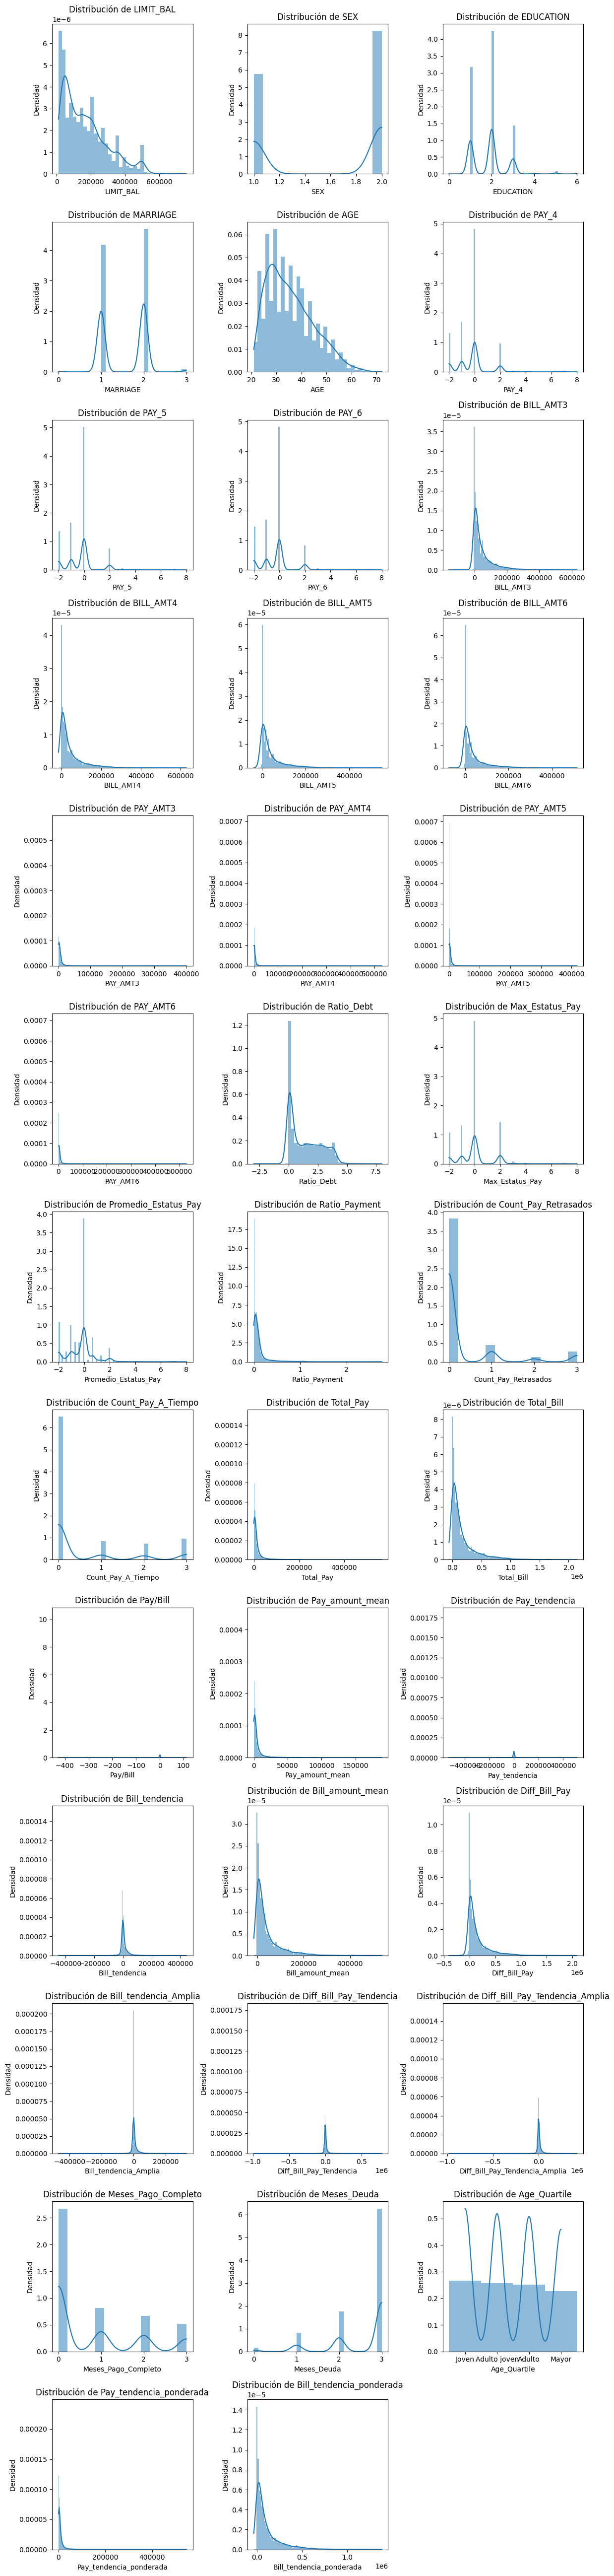

In [1593]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

In [1594]:
lst_column_log = ['LIMIT_BAL','AGE','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                  'PAY_AMT4','PAY_AMT5','PAY_AMT6','Ratio_Debt','Ratio_Payment','Total_Pay','Total_Bill',
                  'Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Pay_tendencia_ponderada','Bill_tendencia_ponderada']

In [1595]:
df.columns

Index(['CUSTOMER_ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Ratio_Debt', 'Max_Estatus_Pay', 'Promedio_Estatus_Pay',
       'Ratio_Payment', 'Count_Pay_Retrasados', 'Count_Pay_A_Tiempo',
       'Total_Pay', 'Total_Bill', 'Pay/Bill', 'Pay_amount_mean',
       'Pay_tendencia', 'Bill_tendencia', 'Bill_amount_mean', 'Diff_Bill_Pay',
       'Bill_tendencia_Amplia', 'Diff_Bill_Pay_Tendencia',
       'Diff_Bill_Pay_Tendencia_Amplia', 'Meses_Pago_Completo', 'Meses_Deuda',
       'Age_Quartile', 'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada'],
      dtype='object')

In [1596]:
lst_column_log

['LIMIT_BAL',
 'AGE',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Ratio_Debt',
 'Ratio_Payment',
 'Total_Pay',
 'Total_Bill',
 'Pay_amount_mean',
 'Bill_amount_mean',
 'Diff_Bill_Pay',
 'Pay_tendencia_ponderada',
 'Bill_tendencia_ponderada']

In [1597]:
for col in lst_column_log:
    offset = abs(df[col].min()) + 1
    df[f'{col}_log'] = np.log1p(df[col] + offset)

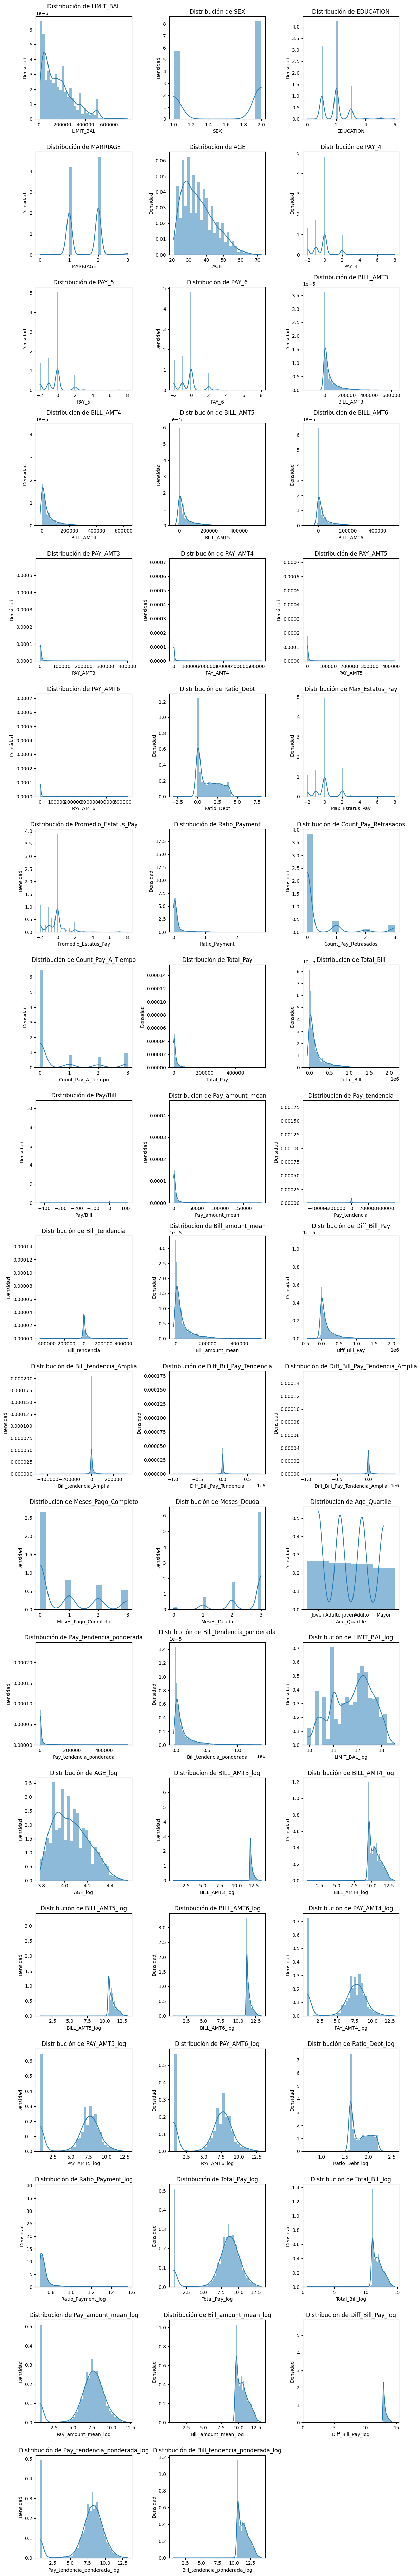

In [1598]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

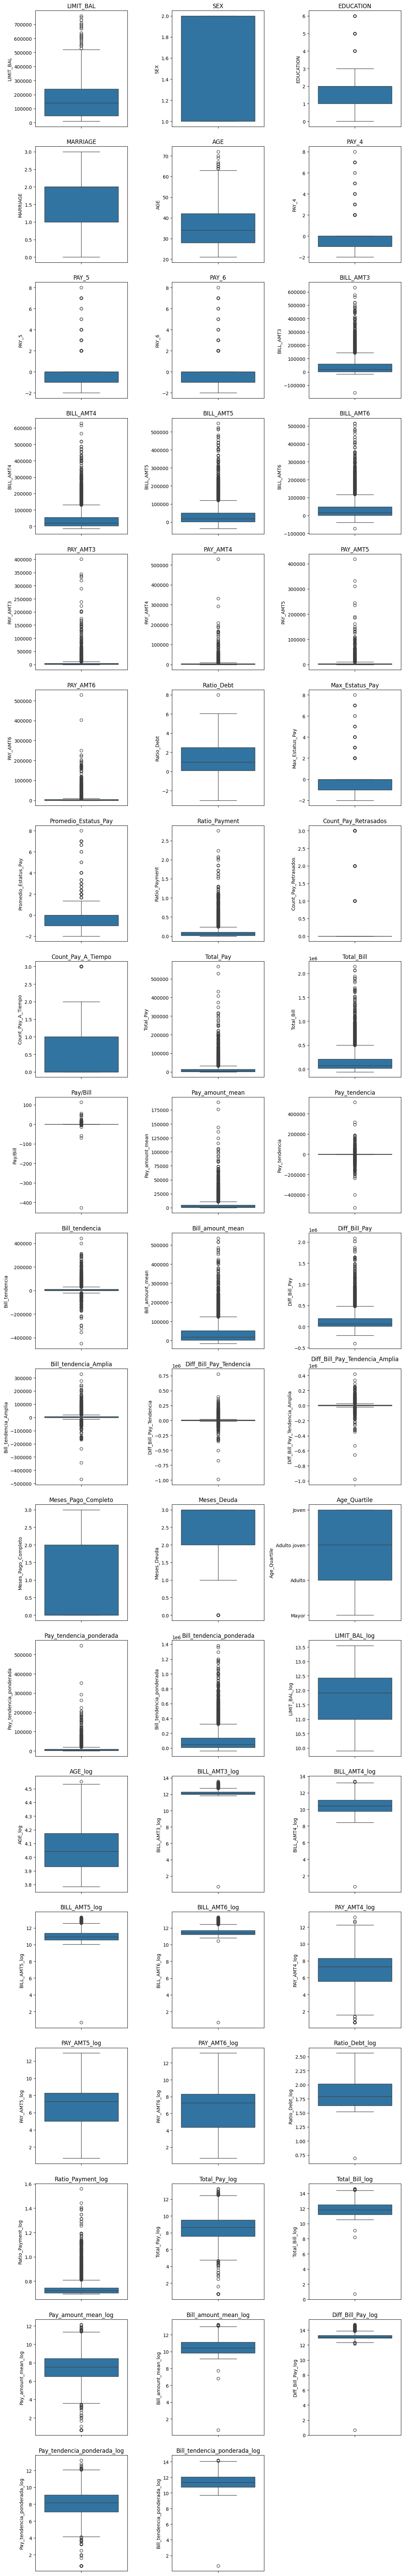

In [1599]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i) 
    sns.boxplot(y=df[var])  
    plt.title(var)  
plt.tight_layout()  
plt.show()


In [1600]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_4  PAY_5  \
0            2662   180000.0    1          2         2   27     -1     -1   
1           12809    50000.0    1          1         3   45      0      0   
2           25951   250000.0    1          2         1   36      0      0   
3            9209   280000.0    1          1         1   31     -2     -2   
4            5954    50000.0    2          2         3   42      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        23545    20000.0    1          2         1   48     -2     -2   
5621        15967    20000.0    1          2         2   42      0      2   
5622         5993   170000.0    2          1         2   31     -1     -1   
5623         1515   100000.0    2          1         2   29      2      2   
5624        13948    30000.0    1          1         2   42      2      0   

      PAY_6  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT3  PAY_AMT4  \
0        -1      644.0    29944.0      644.0      264.0   29944.0     644.0   
1         0    14388.0    18804.0    23460.0    27870.0    5000.0    5000.0   
2         0   157088.0   136787.0   139385.0   122947.0    5200.0    5500.0   
3        -2     1345.0       -5.0       -5.0      985.0       0.0       0.0   
4         0    50694.0    44858.0    19298.0    19514.0    1572.0    5000.0   
...     ...        ...        ...        ...        ...       ...       ...   
5620     -2        0.0        0.0        0.0        0.0       0.0       0.0   
5621      0    11714.0    13923.0    13405.0    13683.0    2726.0       0.0   
5622     -1     7315.0    10730.0     1686.0     9445.0   10730.0    1686.0   
5623      2    67564.0    67443.0    65106.0    70258.0    2500.0       0.0   
5624      0    31380.0    30277.0    30028.0    30198.0       0.0    1100.0   

      PAY_AMT5  PAY_AMT6  Ratio_Debt  Max_Estatus_Pay  Promedio_Estatus_Pay  \
0        264.0    1024.0    0.174978               -1             -1.000000   
1       5000.0    5000.0    1.690440                0              0.000000   
2       5000.0    5000.0    2.224828                0              0.000000   
3        990.0    3090.0    0.008286               -2             -2.000000   
4       1000.0     813.0    2.687280                0              0.000000   
...        ...       ...         ...              ...                   ...   
5620       0.0       0.0    0.000000               -2             -2.000000   
5621     643.0     646.0    2.636250                2              0.666667   
5622    9445.0    3444.0    0.171624               -1             -1.000000   
5623    6918.0    3520.0    2.703710                2              2.000000   
5624    1050.0    1000.0    4.062767                2              0.666667   

      Ratio_Payment  Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  \
0          0.010733                     0                   3     1932.0   
1          0.300000                     0                   0    15000.0   
2          0.062000                     0                   0    15500.0   
3          0.014571                     0                   0     4080.0   
4          0.136260                     0                   0     6813.0   
...             ...                   ...                 ...        ...   
5620       0.000000                     0                   0        0.0   
5621       0.064450                     1                   0     1289.0   
5622       0.085735                     0                   3    14575.0   
5623       0.104380                     3                   0    10438.0   
5624       0.105000                     1                   0     3150.0   

      Total_Bill  Pay/Bill  Pay_amount_mean  Pay_tendencia  Bill_tendencia  \
0        31496.0  0.061341       644.000000         -380.0           380.0   
1        84522.0  0.177469      5000.000000            0.0        -13482.0   
2       556207.0  0.027867      5166

In [1601]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

CUSTOMER_ID                       0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Max_Estatus_Pay                   0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Count_Pay_Retrasados              0
Count_Pay_A_Tiempo                0
Total_Pay                         0
Total_Bill                        0
Pay/Bill                          0
Pay_amount_mean                   0
Pay_tendencia               

In [1602]:
pd.reset_option('display.max_rows')

In [1603]:
df.describe([0.01, 0.25, 0.5, 0.75, 0.99])

CUSTOMER_ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   5625.000000    5625.000000  5625.000000  5625.000000  5625.000000   
mean   14792.455289  167642.666667     1.588622     1.854222     1.542222   
std     8628.206383  130331.221117     0.492127     0.797005     0.523322   
min       10.000000   10000.000000     1.000000     0.000000     0.000000   
1%       324.720000   10000.000000     1.000000     1.000000     1.000000   
25%     7222.000000   50000.000000     1.000000     1.000000     1.000000   
50%    14742.000000  140000.000000     2.000000     2.000000     2.000000   
75%    22196.000000  240000.000000     2.000000     2.000000     2.000000   
99%    29690.800000  500000.000000     2.000000     5.000000     3.000000   
max    29998.000000  760000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_4        PAY_5        PAY_6      BILL_AMT3  \
count  5625.000000  5625.000000  5625.000000  5625.000000    5625.000000   
mean     35.575111    -0.213689    -0.269156    -0.284444   46071.042311   
std       9.213164     1.208607     1.157610     1.180153   67924.291719   
min      21.000000    -2.000000    -2.000000    -2.000000 -157264.000000   
1%       22.000000    -2.000000    -2.000000    -2.000000    -238.320000   
25%      28.000000    -1.000000    -1.000000    -1.000000    2417.000000   
50%      34.000000     0.000000     0.000000     0.000000   19690.000000   
75%      42.000000     0.000000     0.000000     0.000000   59024.000000   
99%      60.000000     3.000000     3.000000     3.000000  307360.080000   
max      72.000000     8.000000     8.000000     8.000000  632041.000000   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT3  \
count    5625.000000    5625.000000    5625.000000    5625.000000   
mean    42955.276622   39541.561422   37884.078044    5304.644800   
std     64142.022806   59848.537614   58307.728327   17493.393385   
min    -15000.000000  -37594.000000  -73895.000000       0.000000   
1%       -232.040000    -200.000000    -340.560000       0.000000   
25%      2270.000000    1727.000000    1047.000000     350.000000   
50%     18864.000000   17515.000000   16062.000000    1800.000000   
75%     53682.000000   49264.000000   47869.000000    4584.000000   
99%    294467.160000  274566.240000  263907.040000   66920.360000   
max    628699.000000  547880.000000  514975.000000  400972.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6   Ratio_Debt  \
count    5625.000000    5625.000000    5625.000000  5625.000000   
mean     4672.380089    4534.108978    5407.481778     1.380359   
std     15377.027533   14408.222644   18516.746575     1.357007   
min         0.000000       0.000000       0.000000    -3.000000   
1%          0.000000       0.000000       0.000000    -0.000014   
25%       257.000000     150.000000      76.000000     0.086906   
50%      1500.000000    1452.000000    1445.000000     0.992413   
75%      4000.000000    4000.000000    4000.000000     2.506933   
99%     55942.880000   58322.400000   85690.000000     4.076976   
max    528897.000000  417990.000000  528666.000000     7.984300   

       Max_Estatus_Pay  Promedio_Estatus_Pay  Ratio_Payment  \
count      5625.000000           5625.000000    5625.000000   
mean          0.009778             -0.255763       0.104529   
std           1.280285              1.093018       0.181302   
min          -2.000000             -2.000000       0.000000   
1%           -2.000000             -2.000000       0.000000   
25%          -1.000000             -1.000000       0.019385   
50%           0.000000              0.000000       0.058278   
75%           0.000000              0.000000       0.108233   
99%           3.000000              2.333333       0.999757   
max           8.000000              8.000000       2.759533   

       Count_Pay_Retrasados  Count_Pay_A_Tiempo      Total_Pay    Total_Bill  \
count           5625.000000         5625.000000    

### Outiliers

In [1604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     5625 non-null   int64   
 1   LIMIT_BAL                       5625 non-null   float64 
 2   SEX                             5625 non-null   int64   
 3   EDUCATION                       5625 non-null   int64   
 4   MARRIAGE                        5625 non-null   int64   
 5   AGE                             5625 non-null   int64   
 6   PAY_4                           5625 non-null   int64   
 7   PAY_5                           5625 non-null   int64   
 8   PAY_6                           5625 non-null   int64   
 9   BILL_AMT3                       5625 non-null   float64 
 10  BILL_AMT4                       5625 non-null   float64 
 11  BILL_AMT5                       5625 non-null   float64 
 12  BILL_AMT6           

In [1605]:
lst_out_upper = ['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT4','PAY_AMT5','PAY_AMT6','Promedio_Estatus_Pay','Ratio_Payment','Total_Pay', 'Total_Bill',
                 'Pay/Bill','Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Ratio_Payment_log','Pay_tendencia_ponderada','Bill_tendencia_ponderada']
lst_out_both = ['Pay/Bill','Pay_tendencia','Bill_tendencia','Bill_tendencia_Amplia','Diff_Bill_Pay_Tendencia',
                'Diff_Bill_Pay_Tendencia_Amplia','BILL_AMT3_log','BILL_AMT4_log','BILL_AMT5_log',
                'BILL_AMT6_log','PAY_AMT4_log','PAY_AMT5_log','Total_Pay_log','Diff_Bill_Pay_log','Pay_tendencia_ponderada_log']
lst_out_lower = ['Total_Bill_log','Bill_amount_mean_log','Bill_tendencia_ponderada_log']

In [1606]:
for v in lst_out_upper: # Debido a la gran cantidad de outliers vistos en los boxplot, aplicamos winsorize parta no perder tantos datos
    df[v] = winsorize(df[v], limits = [0, 0.065])

for v in lst_out_both:
    df[v] = winsorize(df[v], limits = [0.065, 0.065])

for v in lst_out_lower:
    df[v] = winsorize(df[v], limits = [0.065, 0])


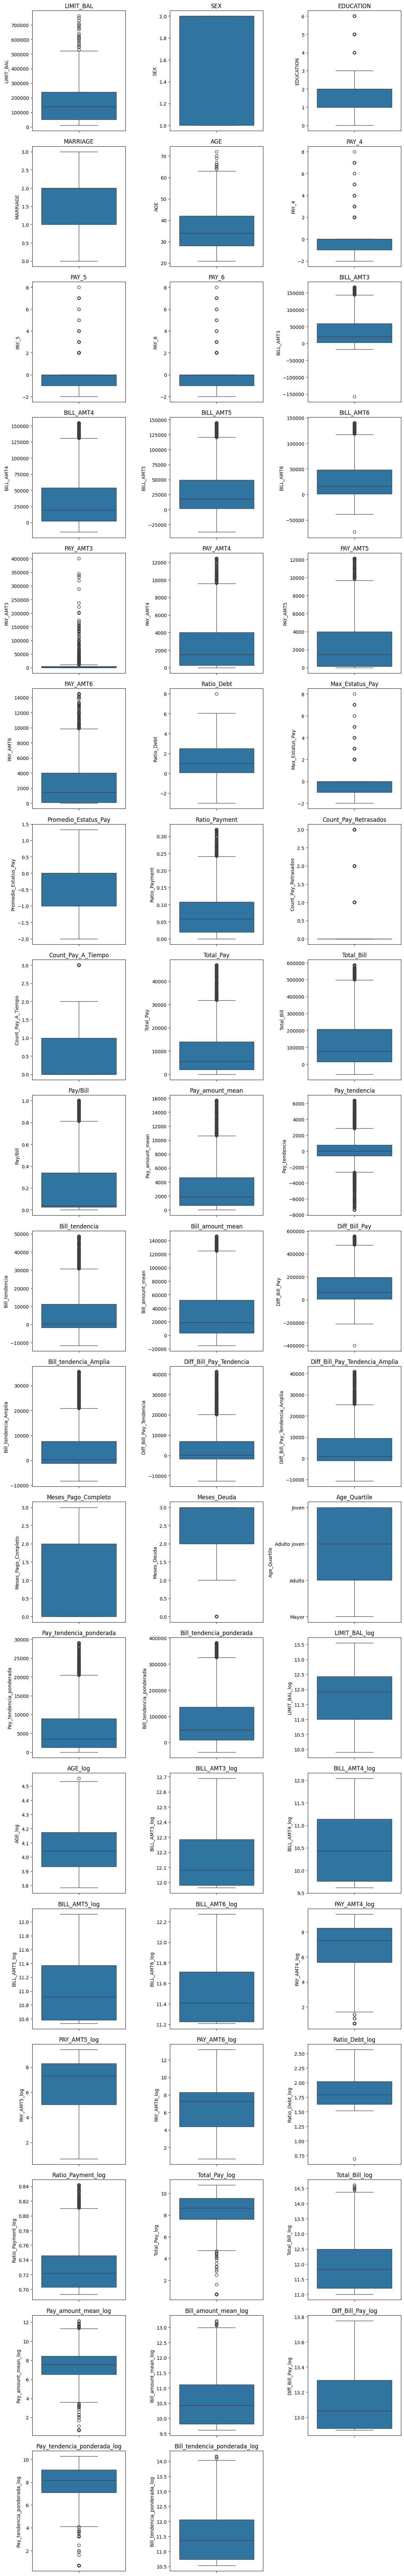

In [1607]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.boxplot(y=df[var])  
    plt.title(var)  
plt.tight_layout()  
plt.show()

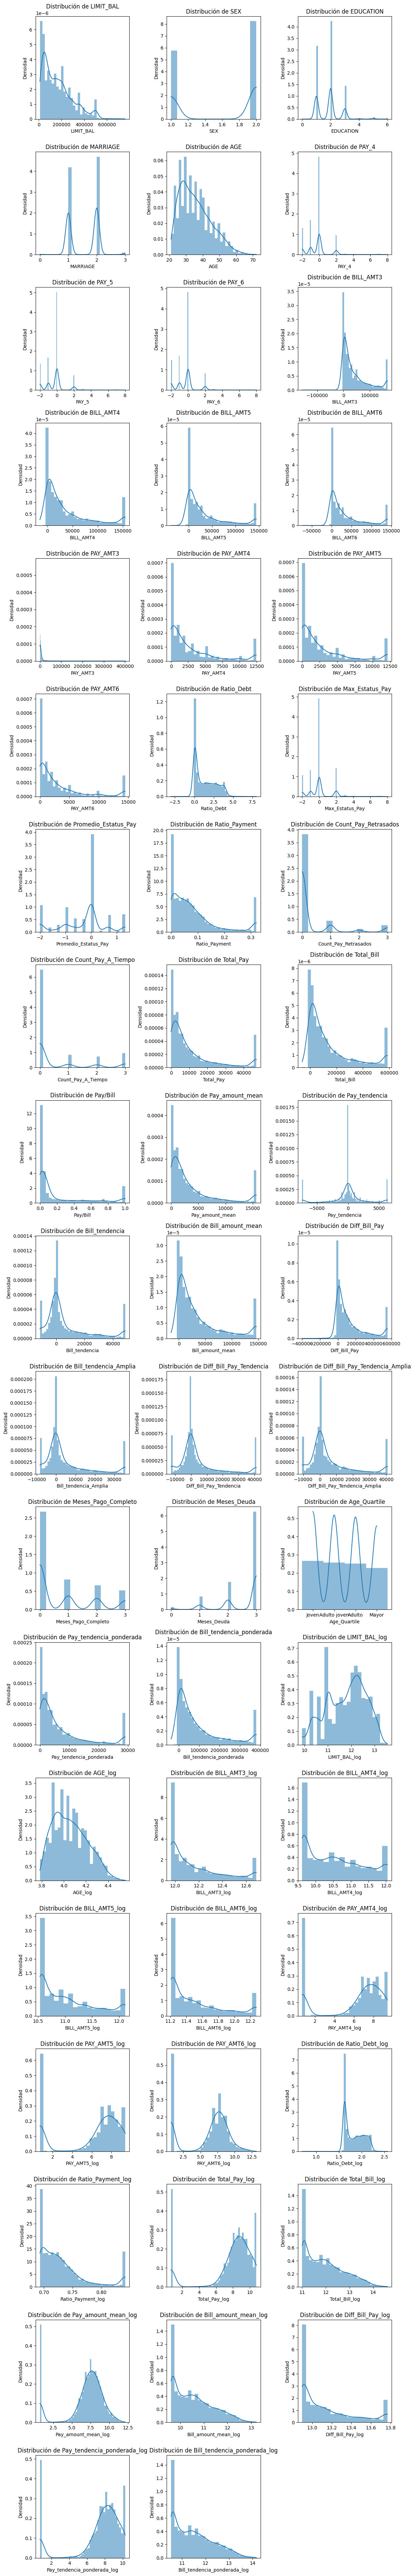

In [1608]:
aux = df.drop(columns = 'CUSTOMER_ID')
list_column = aux.columns

num_var = len(list_column)
cols = 3
rows = (num_var // cols) + (num_var % cols > 0)
plt.figure(figsize=(cols * 4, rows * 4))

for i, var in enumerate(list_column, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.plot(linewidth=2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

### Codificacion

In [1609]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_4  PAY_5  \
0            2662   180000.0    1          2         2   27     -1     -1   
1           12809    50000.0    1          1         3   45      0      0   
2           25951   250000.0    1          2         1   36      0      0   
3            9209   280000.0    1          1         1   31     -2     -2   
4            5954    50000.0    2          2         3   42      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
5620        23545    20000.0    1          2         1   48     -2     -2   
5621        15967    20000.0    1          2         2   42      0      2   
5622         5993   170000.0    2          1         2   31     -1     -1   
5623         1515   100000.0    2          1         2   29      2      2   
5624        13948    30000.0    1          1         2   42      2      0   

      PAY_6  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT3  PAY_AMT4  \
0        -1      644.0    29944.0      644.0      264.0   29944.0     644.0   
1         0    14388.0    18804.0    23460.0    27870.0    5000.0    5000.0   
2         0   157088.0   136787.0   139385.0   122947.0    5200.0    5500.0   
3        -2     1345.0       -5.0       -5.0      985.0       0.0       0.0   
4         0    50694.0    44858.0    19298.0    19514.0    1572.0    5000.0   
...     ...        ...        ...        ...        ...       ...       ...   
5620     -2        0.0        0.0        0.0        0.0       0.0       0.0   
5621      0    11714.0    13923.0    13405.0    13683.0    2726.0       0.0   
5622     -1     7315.0    10730.0     1686.0     9445.0   10730.0    1686.0   
5623      2    67564.0    67443.0    65106.0    70258.0    2500.0       0.0   
5624      0    31380.0    30277.0    30028.0    30198.0       0.0    1100.0   

      PAY_AMT5  PAY_AMT6  Ratio_Debt  Max_Estatus_Pay  Promedio_Estatus_Pay  \
0        264.0    1024.0    0.174978               -1             -1.000000   
1       5000.0    5000.0    1.690440                0              0.000000   
2       5000.0    5000.0    2.224828                0              0.000000   
3        990.0    3090.0    0.008286               -2             -2.000000   
4       1000.0     813.0    2.687280                0              0.000000   
...        ...       ...         ...              ...                   ...   
5620       0.0       0.0    0.000000               -2             -2.000000   
5621     643.0     646.0    2.636250                2              0.666667   
5622    9445.0    3444.0    0.171624               -1             -1.000000   
5623    6918.0    3520.0    2.703710                2              1.333333   
5624    1050.0    1000.0    4.062767                2              0.666667   

      Ratio_Payment  Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  \
0          0.010733                     0                   3     1932.0   
1          0.300000                     0                   0    15000.0   
2          0.062000                     0                   0    15500.0   
3          0.014571                     0                   0     4080.0   
4          0.136260                     0                   0     6813.0   
...             ...                   ...                 ...        ...   
5620       0.000000                     0                   0        0.0   
5621       0.064450                     1                   0     1289.0   
5622       0.085735                     0                   3    14575.0   
5623       0.104380                     3                   0    10438.0   
5624       0.105000                     1                   0     3150.0   

      Total_Bill  Pay/Bill  Pay_amount_mean  Pay_tendencia  Bill_tendencia  \
0        31496.0  0.061341       644.000000         -380.0           380.0   
1        84522.0  0.177469      5000.000000            0.0        -11588.0   
2       556207.0  0.027867      5166

In [1610]:
df['Age_Quartile'].unique()

['Joven', 'Mayor', 'Adulto', 'Adulto joven']
Categories (4, object): ['Joven' < 'Adulto joven' < 'Adulto' < 'Mayor']

In [1611]:
df = pd.get_dummies(df, columns = ['EDUCATION'],prefix='EDUCATION') # Codificamos las variables para el modelo
df = pd.get_dummies(df, columns = ['MARRIAGE'],prefix='MARRIAGE')
mapeo_Age = {'Joven':1, 'Adulto joven' :2, 'Adulto':3, 'Mayor':4}
df['Age_Quartile'] = df['Age_Quartile'].map(mapeo_Age)

In [1612]:
aux = df.drop(columns = ['PAY_AMT3'])
cod_columns = aux.columns

In [1613]:
cod_columns

Index(['CUSTOMER_ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'Ratio_Debt', 'Max_Estatus_Pay',
       'Promedio_Estatus_Pay', 'Ratio_Payment', 'Count_Pay_Retrasados',
       'Count_Pay_A_Tiempo', 'Total_Pay', 'Total_Bill', 'Pay/Bill',
       'Pay_amount_mean', 'Pay_tendencia', 'Bill_tendencia',
       'Bill_amount_mean', 'Diff_Bill_Pay', 'Bill_tendencia_Amplia',
       'Diff_Bill_Pay_Tendencia', 'Diff_Bill_Pay_Tendencia_Amplia',
       'Meses_Pago_Completo', 'Meses_Deuda', 'Age_Quartile',
       'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada', 'LIMIT_BAL_log',
       'AGE_log', 'BILL_AMT3_log', 'BILL_AMT4_log', 'BILL_AMT5_log',
       'BILL_AMT6_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log',
       'Ratio_Debt_log', 'Ratio_Payment_log', 'Total_Pay_log',
       'Total_Bill_log', 'Pay_amount_mean_log', 'Bill_amount_mean_log',
       'Diff_Bill_Pay_log', 'Pay_te

In [1614]:
df

CUSTOMER_ID  LIMIT_BAL  SEX  AGE  PAY_4  PAY_5  PAY_6  BILL_AMT3  \
0            2662   180000.0    1   27     -1     -1     -1      644.0   
1           12809    50000.0    1   45      0      0      0    14388.0   
2           25951   250000.0    1   36      0      0      0   157088.0   
3            9209   280000.0    1   31     -2     -2     -2     1345.0   
4            5954    50000.0    2   42      0      0      0    50694.0   
...           ...        ...  ...  ...    ...    ...    ...        ...   
5620        23545    20000.0    1   48     -2     -2     -2        0.0   
5621        15967    20000.0    1   42      0      2      0    11714.0   
5622         5993   170000.0    2   31     -1     -1     -1     7315.0   
5623         1515   100000.0    2   29      2      2      2    67564.0   
5624        13948    30000.0    1   42      2      0      0    31380.0   

      BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       29944.0      644.0      264.0   29944.0     644.0     264.0    1024.0   
1       18804.0    23460.0    27870.0    5000.0    5000.0    5000.0    5000.0   
2      136787.0   139385.0   122947.0    5200.0    5500.0    5000.0    5000.0   
3          -5.0       -5.0      985.0       0.0       0.0     990.0    3090.0   
4       44858.0    19298.0    19514.0    1572.0    5000.0    1000.0     813.0   
...         ...        ...        ...       ...       ...       ...       ...   
5620        0.0        0.0        0.0       0.0       0.0       0.0       0.0   
5621    13923.0    13405.0    13683.0    2726.0       0.0     643.0     646.0   
5622    10730.0     1686.0     9445.0   10730.0    1686.0    9445.0    3444.0   
5623    67443.0    65106.0    70258.0    2500.0       0.0    6918.0    3520.0   
5624    30277.0    30028.0    30198.0       0.0    1100.0    1050.0    1000.0   

      Ratio_Debt  Max_Estatus_Pay  Promedio_Estatus_Pay  Ratio_Payment  \
0       0.174978               -1             -1.000000       0.010733   
1       1.690440                0              0.000000       0.300000   
2       2.224828                0              0.000000       0.062000   
3       0.008286               -2             -2.000000       0.014571   
4       2.687280                0              0.000000       0.136260   
...          ...              ...                   ...            ...   
5620    0.000000               -2             -2.000000       0.000000   
5621    2.636250                2              0.666667       0.064450   
5622    0.171624               -1             -1.000000       0.085735   
5623    2.703710                2              1.333333       0.104380   
5624    4.062767                2              0.666667       0.105000   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  Total_Bill  \
0                        0                   3     1932.0     31496.0   
1                        0                   0    15000.0     84522.0   
2                        0                   0    15500.0    556207.0   
3                        0                   0     4080.0      2320.0   
4                        0                   0     6813.0    134364.0   
...                    ...                 ...        ...         ...   
5620                     0                   0        0.0         0.0   
5621                     1                   0     1289.0     52725.0   
5622                     0                   3    14575.0     29176.0   
5623                     3                   0    10438.0    270371.0   
5624                     1                   0     3150.0    121883.0   

      Pay/Bill  Pay_amount_mean  Pay_tendencia  Bill_tendencia  \
0     0.061341       644.000000         -380.0           380.0   
1     0.177469      5000.000000            0.0        -11588.0   
2     0.027867      5166.666667          500.0         34141.0   
3     1.000000      1360.000000        -3090.0           360.0   
4     0.050706      2271.000000         4187.0  

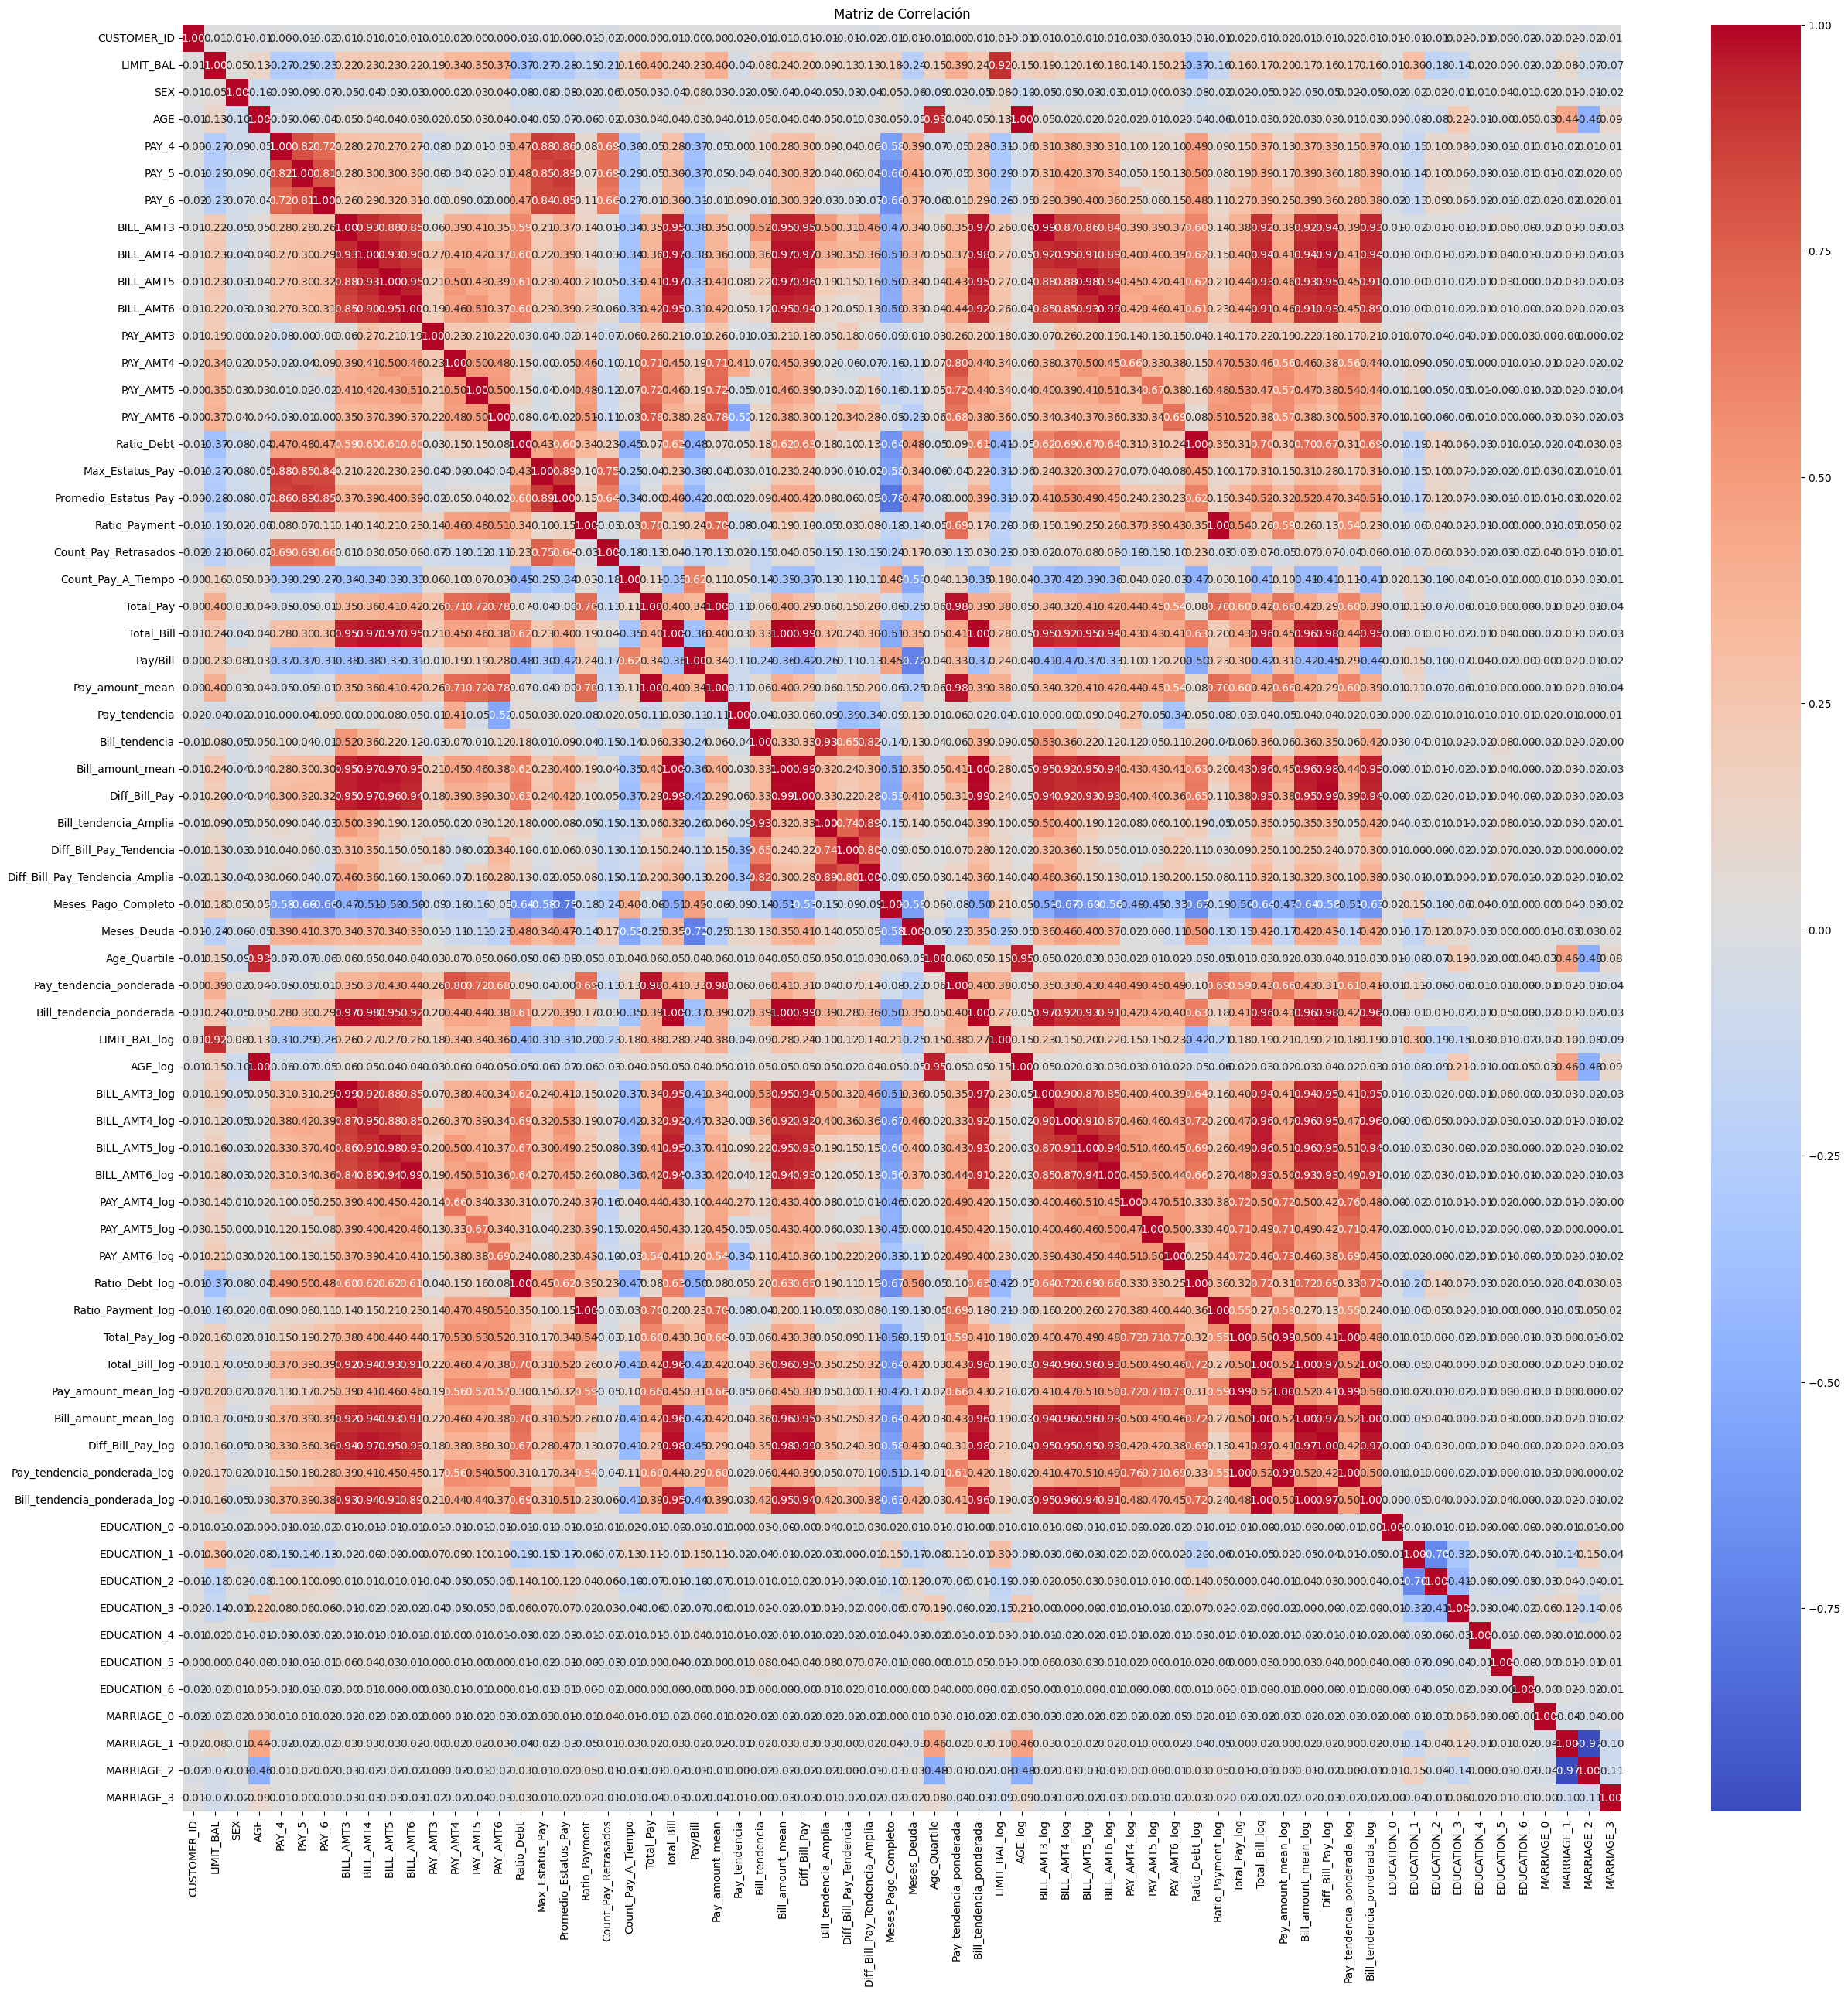

In [1615]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix["PAY_AMT3"].sort_values(ascending=False)
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [1616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     5625 non-null   int64   
 1   LIMIT_BAL                       5625 non-null   float64 
 2   SEX                             5625 non-null   int64   
 3   AGE                             5625 non-null   int64   
 4   PAY_4                           5625 non-null   int64   
 5   PAY_5                           5625 non-null   int64   
 6   PAY_6                           5625 non-null   int64   
 7   BILL_AMT3                       5625 non-null   float64 
 8   BILL_AMT4                       5625 non-null   float64 
 9   BILL_AMT5                       5625 non-null   float64 
 10  BILL_AMT6                       5625 non-null   float64 
 11  PAY_AMT3                        5625 non-null   float64 
 12  PAY_AMT4            

In [1617]:
numeric_columns = df.select_dtypes(include = ['float64']).columns

In [1618]:
numeric_columns

Index(['LIMIT_BAL', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Ratio_Debt',
       'Promedio_Estatus_Pay', 'Ratio_Payment', 'Total_Pay', 'Total_Bill',
       'Pay/Bill', 'Pay_amount_mean', 'Pay_tendencia', 'Bill_tendencia',
       'Bill_amount_mean', 'Diff_Bill_Pay', 'Bill_tendencia_Amplia',
       'Diff_Bill_Pay_Tendencia', 'Diff_Bill_Pay_Tendencia_Amplia',
       'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada', 'LIMIT_BAL_log',
       'AGE_log', 'BILL_AMT3_log', 'BILL_AMT4_log', 'BILL_AMT5_log',
       'BILL_AMT6_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log',
       'Ratio_Debt_log', 'Ratio_Payment_log', 'Total_Pay_log',
       'Total_Bill_log', 'Pay_amount_mean_log', 'Bill_amount_mean_log',
       'Diff_Bill_Pay_log', 'Pay_tendencia_ponderada_log',
       'Bill_tendencia_ponderada_log'],
      dtype='object')

In [1619]:
len(numeric_columns)

43

In [1620]:
numeric_columns = [col for col in numeric_columns if col != 'PAY_AMT3']

In [1621]:
numeric_columns

['LIMIT_BAL',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Ratio_Debt',
 'Promedio_Estatus_Pay',
 'Ratio_Payment',
 'Total_Pay',
 'Total_Bill',
 'Pay/Bill',
 'Pay_amount_mean',
 'Pay_tendencia',
 'Bill_tendencia',
 'Bill_amount_mean',
 'Diff_Bill_Pay',
 'Bill_tendencia_Amplia',
 'Diff_Bill_Pay_Tendencia',
 'Diff_Bill_Pay_Tendencia_Amplia',
 'Pay_tendencia_ponderada',
 'Bill_tendencia_ponderada',
 'LIMIT_BAL_log',
 'AGE_log',
 'BILL_AMT3_log',
 'BILL_AMT4_log',
 'BILL_AMT5_log',
 'BILL_AMT6_log',
 'PAY_AMT4_log',
 'PAY_AMT5_log',
 'PAY_AMT6_log',
 'Ratio_Debt_log',
 'Ratio_Payment_log',
 'Total_Pay_log',
 'Total_Bill_log',
 'Pay_amount_mean_log',
 'Bill_amount_mean_log',
 'Diff_Bill_Pay_log',
 'Pay_tendencia_ponderada_log',
 'Bill_tendencia_ponderada_log']

In [1622]:
categorical_columns = df.select_dtypes(exclude = ['float64']).columns

In [1623]:
categorical_columns

Index(['CUSTOMER_ID', 'SEX', 'AGE', 'PAY_4', 'PAY_5', 'PAY_6',
       'Max_Estatus_Pay', 'Count_Pay_Retrasados', 'Count_Pay_A_Tiempo',
       'Meses_Pago_Completo', 'Meses_Deuda', 'Age_Quartile', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [1624]:
sc = StandardScaler()
y = df['PAY_AMT3']
df_scaled = sc.fit_transform(df[numeric_columns])
df_scaled = pd.DataFrame(df_scaled, columns = numeric_columns)

In [1625]:
df_scaled.describe() # Comprobamos que se aplico standar_scaler correctamente

LIMIT_BAL     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6  \
count  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03   
mean   1.016866e-16 -6.505413e-17 -7.579123e-18 -3.284286e-17  8.842310e-18   
std    1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00   
min   -1.209662e+00 -3.957012e+00 -1.136238e+00 -1.655136e+00 -2.519837e+00   
25%   -9.027240e-01 -7.692033e-01 -7.655885e-01 -7.580184e-01 -7.586019e-01   
50%   -2.121144e-01 -4.243719e-01 -4.094474e-01 -3.978117e-01 -4.057298e-01   
75%    5.552297e-01  3.608766e-01  3.378177e-01  3.265488e-01  3.417763e-01   
max    4.545419e+00  2.510019e+00  2.503444e+00  2.503760e+00  2.512827e+00   

           PAY_AMT4      PAY_AMT5      PAY_AMT6    Ratio_Debt  \
count  5.625000e+03  5.625000e+03  5.625000e+03  5.625000e+03   
mean   2.779012e-17  4.042199e-17  4.200097e-17 -1.035813e-16   
std    1.000089e+00  1.000089e+00  1.000089e+00  1.000089e+00   
min   -8.102027e-01 -8.067375e-01 -7.528153e-01 -3.228242e+00   
25%   -7.385034e-01 -7.641110e-01 -7.339692e-01 -9.532501e-01   
50%   -3.917241e-01 -3.941137e-01 -3.944920e-01 -2.859086e-01   
75%    3.057402e-01  3.299670e-01  2.390831e-01  8.302646e-01   
max    2.663170e+00  2.636909e+00  2.835873e+00  4.866981e+00   

       Promedio_Estatus_Pay  Ratio_Payment     Total_Pay    Total_Bill  \
count          5.625000e+03   5.625000e+03  5.625000e+03  5.625000e+03   
mean          -6.947529e-18   5.684342e-18 -2.305316e-17 -1.515825e-17   
std            1.000089e+00   1.000089e+00  1.000089e+00  1.000089e+00   
min           -1.865621e+00  -9.481145e-01 -8.208304e-01 -1.177347e+00   
25%           -7.531703e-01  -7.250177e-01 -6.691785e-01 -7.601846e-01   
50%            3.592804e-01  -2.774254e-01 -3.962050e-01 -4.058495e-01   
75%            3.592804e-01   2.974876e-01  2.392166e-01  3.412615e-01   
max            1.842548e+00   2.736443e+00  2.740867e+00  2.488617e+00   

           Pay/Bill  Pay_amount_mean  Pay_tendencia  Bill_tendencia  \
count  5.625000e+03     5.625000e+03   5.625000e+03    5.625000e+03   
mean   8.147557e-17     5.052748e-18  -2.526374e-17   -3.663243e-17   
std    1.000089e+00     1.000089e+00   1.000089e+00    1.000089e+00   
min   -6.946575e-01    -8.208304e-01  -2.413138e+00   -1.154969e+00   
25%   -6.185192e-01    -6.691785e-01  -1.812953e-01   -5.456525e-01   
50%   -5.720469e-01    -3.962050e-01   1.489616e-02   -4.197944e-01   
75%    3.622349e-01     2.392166e-01   2.716568e-01    2.622827e-01   
max    2.420780e+00     2.740867e+00   2.096962e+00    2.585476e+00   

       Bill_amount_mean  Diff_Bill_Pay  Bill_tendencia_Amplia  \
count      5.625000e+03   5.625000e+03           5.625000e+03   
mean      -1.515825e-17   2.905330e-17           1.894781e-18   
std        1.000089e+00   1.000089e+00           1.000089e+00   
min       -1.177347e+00  -3.135256e+00          -1.147079e+00   
25%       -7.601846e-01  -7.577244e-01          -5.350213e-01   
50%       -4.058495e-01  -3.991914e-01          -4.107134e-01   
75%        3.412615e-01   3.573517e-01           2.276797e-01   
max        2.488617e+00   2.477868e+00           2.636384e+00   

       Diff_Bill_Pay_Tendencia  Diff_Bill_Pay_Tendencia_Amplia  \
count             5.625000e+03                    5.625000e+03   
mean             -2.400055e-17                    2.147418e-17   
std               1.000089e+00                    1.000089e+00   
min              -1.287722e+00                   -1.242132e+00   
25%              -4.888447e-01                   -5.314309e-01   
50%              -3.508388e-01                   -3.881437e-01   
75%               1.554276e-01                    2.588457e-01   
max               2.665093e+00                    2.592774e+00   

       Pay_tendencia_ponderada  Bill_tendencia_ponderada  LIMIT_BAL_log  \
count             5.625000e+03              5.625000e+03   5.625000e+03   
mean             -6.631732e-17             -5.558023e-17   1.669302e-15   

In [1626]:
df_categorical = df[categorical_columns]

In [1627]:
df_categorical

CUSTOMER_ID  SEX  AGE  PAY_4  PAY_5  PAY_6  Max_Estatus_Pay  \
0            2662    1   27     -1     -1     -1               -1   
1           12809    1   45      0      0      0                0   
2           25951    1   36      0      0      0                0   
3            9209    1   31     -2     -2     -2               -2   
4            5954    2   42      0      0      0                0   
...           ...  ...  ...    ...    ...    ...              ...   
5620        23545    1   48     -2     -2     -2               -2   
5621        15967    1   42      0      2      0                2   
5622         5993    2   31     -1     -1     -1               -1   
5623         1515    2   29      2      2      2                2   
5624        13948    1   42      2      0      0                2   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Meses_Pago_Completo  \
0                        0                   3                    1   
1                        0                   0                    0   
2                        0                   0                    0   
3                        0                   0                    3   
4                        0                   0                    0   
...                    ...                 ...                  ...   
5620                     0                   0                    3   
5621                     1                   0                    0   
5622                     0                   3                    1   
5623                     3                   0                    0   
5624                     1                   0                    0   

      Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  EDUCATION_2  \
0               2            1        False        False         True   
1               3            4        False         True        False   
2               3            3        False        False         True   
3               0            2        False         True        False   
4               3            3        False        False         True   
...           ...          ...          ...          ...          ...   
5620            3            4        False        False         True   
5621            3            3        False        False         True   
5622            2            2        False         True        False   
5623            3            2        False         True        False   
5624            3            3        False         True        False   

      EDUCATION_3  EDUCATION_4  EDUCATION_5  EDUCATION_6  MARRIAGE_0  \
0           False        False        False        False       False   
1           False        False        False        False       False   
2           False        False        False        False       False   
3           False        False        False        False       False   
4           False        False        False        False       False   
...           ...          ...          ...          ...         ...   
5620        False        False        False        False       False   
5621        False        False        False        False       False   
5622        False        False        False        False       False   
5623        False        False        False        False       False   
5624        False        False        False        False       False   

      MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0          False        True       False  
1          False       False        True  
2           True       False       False  
3           True       False       False  
4          False       False        True  
...          ...         ...         ...  
5620        True       False       False  
5621       False        True       False  
5622       False        True       False  
5623       False        True       False  
5624       False        True       False  

[5625 rows x 23 columns]

### Modelo sin PCA

In [1628]:
df_sin_PCA = pd.concat([df_scaled, df_categorical.reset_index(drop=True)], axis=1)

In [1629]:
pd.set_option('display.max_rows', None)
df_sin_PCA.isnull().sum()

LIMIT_BAL                         0
BILL_AMT3                         0
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
Ratio_Debt                        0
Promedio_Estatus_Pay              0
Ratio_Payment                     0
Total_Pay                         0
Total_Bill                        0
Pay/Bill                          0
Pay_amount_mean                   0
Pay_tendencia                     0
Bill_tendencia                    0
Bill_amount_mean                  0
Diff_Bill_Pay                     0
Bill_tendencia_Amplia             0
Diff_Bill_Pay_Tendencia           0
Diff_Bill_Pay_Tendencia_Amplia    0
Pay_tendencia_ponderada           0
Bill_tendencia_ponderada          0
LIMIT_BAL_log                     0
AGE_log                           0
BILL_AMT3_log                     0
BILL_AMT4_log               

In [1630]:
pd.reset_option('display.max_rows')

In [1631]:
X = df_sin_PCA.drop(columns = ['CUSTOMER_ID'])

In [1632]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1633]:
X_train

LIMIT_BAL  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT4  \
2758   0.708699  -0.817455  -0.814307  -0.797420  -0.783208 -0.810203   
5465  -1.132927  -0.497558  -0.483363  -0.479627  -0.517479 -0.531217   
4016  -1.132927  -0.424292  -0.384981  -0.337488  -0.311795 -0.531217   
3857  -0.058646   0.974558   1.072613   1.171054   1.209562  0.014479   
706    0.325026  -0.839755  -0.846779  -0.840975   0.603769 -0.810203   
...         ...        ...        ...        ...        ...       ...   
3772  -0.902724   0.155391   0.235916  -0.133132  -0.101693 -0.647833   
5191   1.782980   1.714309   1.426973   1.597950   1.427278  0.026754   
5226   2.396855   2.510019   2.503444   2.503760   2.512827 -0.810203   
5390  -1.132927  -0.461744  -0.379680  -0.348941  -0.334991 -0.810203   
860    0.555230  -0.729835  -0.595845  -0.673921  -0.738579  0.699947   

      PAY_AMT5  PAY_AMT6  Ratio_Debt  Promedio_Estatus_Pay  Ratio_Payment  \
2758 -0.806737 -0.752815   -1.017298             -1.865621      -0.948115   
5465 -0.806737 -0.256866    1.071307              1.842548       0.778159   
4016 -0.522561 -0.554436    1.927531              0.359280       0.663074   
3857  0.074209  0.090298    0.589118              0.359280      -0.267963   
706   2.636909 -0.207271   -0.826111             -1.494804       2.569209   
...        ...       ...         ...                   ...            ...   
3772 -0.641915  2.835873    1.278840              0.359280       2.736443   
5191  0.102626 -0.058486   -0.224496              0.359280      -0.689174   
5226  2.636909  2.835873    1.911594              1.842548       0.063673   
5390 -0.806737 -0.752815    1.812636              1.842548      -0.948115   
860  -0.267087  2.835873   -0.950110             -0.753170       0.456784   

      Total_Pay  Total_Bill  Pay/Bill  Pay_amount_mean  Pay_tendencia  \
2758  -0.820830   -0.836913 -0.694657        -0.820830       0.014896   
5465  -0.593353   -0.515316 -0.529761        -0.593353      -0.314284   
4016  -0.608518   -0.383477 -0.585503        -0.608518       0.080732   
3857  -0.103820    1.141894 -0.610187        -0.103820      -0.131260   
706    2.740867   -0.527810  2.420780         2.740867      -0.709301   
...         ...         ...       ...              ...            ...   
3772   1.542058    0.046968 -0.071450         1.542058      -2.413138   
5191  -0.138397    1.604550 -0.629496        -0.138397       0.080732   
5226   2.379026    2.488617 -0.625738         2.379026      -2.413138   
5390  -0.820830   -0.401169 -0.694657        -0.820830       0.014896   
860    1.400719   -0.712768  2.420780         1.400719      -2.413138   

      Bill_tendencia  Bill_amount_mean  Diff_Bill_Pay  Bill_tendencia_Amplia  \
2758       -0.436170         -0.836913      -0.783092              -0.427782   
5465       -0.143577         -0.515316      -0.467511              -0.160201   
4016       -0.458811         -0.383477      -0.329732              -0.450195   
3857       -0.127883          1.141894       1.211632              -0.142874   
706        -1.154969         -0.527810      -0.840141              -1.147079   
...              ...               ...            ...                    ...   
3772        0.787797          0.046968      -0.050470               1.276927   
5191        1.595981          1.604550       1.693688               0.960166   
5226        0.151312          2.488617       2.477868               0.666680   
5390       -0.513955         -0.401169      -0.331601              -0.456230   
860        -0.281717         -0.712768      -0.826702              -0.115029   

      Diff_Bill_Pay_Tendencia  Diff_Bill_Pay_Tendencia_Amplia  \
2758                -0.360460                       -0.447127   
5465                 0.015071                       -0.215961   
4016                -0.379189                       -0.473937   
3857                -0.098330                       -0.179096   
706                 -1.287722            

In [1634]:
model_lin = LinearRegression()

In [1635]:
model_lin.fit(X_train,y_train)

LinearRegression()

In [1636]:
cv_scores = cross_val_score(model_lin, X_train, y_train, cv=5, scoring='r2')

In [1637]:
print(cv_scores)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[0.39835976 0.64753342 0.64095544 0.21690716 0.19318606]
r2: 0.42 (+/- 0.39)


In [1638]:
y_pred = model_lin.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.6424625174774734


### Modelo con PCA

In [1639]:
pca = PCA(n_components = 30)
X_PCA = pca.fit_transform(df_scaled)

In [1640]:
X_PCA

array([[-2.89844746e+00, -5.13622333e-01,  1.79978987e+00, ...,
        -5.71082944e-02, -1.15192118e-01, -1.85974762e-01],
       [ 1.67067413e-01,  2.99133744e+00, -3.20941783e+00, ...,
        -3.18922459e-02,  7.47438378e-02,  8.17340275e-03],
       [ 8.51777142e+00, -2.24679093e+00,  1.31552391e+00, ...,
         8.97875149e-03, -8.57810764e-02, -6.09403249e-02],
       ...,
       [-1.84004182e+00,  2.91317111e+00,  5.07695272e-01, ...,
        -2.62666678e-02, -5.51213867e-02, -6.59731665e-02],
       [ 3.28378890e+00, -1.18733775e+00, -1.54323876e+00, ...,
         4.51677301e-02,  2.19438780e-02,  2.10935120e-02],
       [ 2.05498304e-01, -1.43336099e+00, -2.81719858e+00, ...,
         6.62644771e-03, -1.31077575e-02,  1.61035759e-02]])

In [1641]:
y

0       29944.0
1        5000.0
2        5200.0
3           0.0
4        1572.0
         ...   
5620        0.0
5621     2726.0
5622    10730.0
5623     2500.0
5624        0.0
Name: PAY_AMT3, Length: 5625, dtype: float64

In [1642]:
df_pca = pd.DataFrame(X_PCA, columns=[f'PCA_{i+1}' for i in range(X_PCA.shape[1])])

In [1643]:
df_pca

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0    -2.898447 -0.513622  1.799790 -0.739861  1.279421 -0.441916 -1.126868   
1     0.167067  2.991337 -3.209418 -1.090714 -0.781657  0.063400  1.389445   
2     8.517771 -2.246791  1.315524  1.199779  0.362056  0.070768 -0.132881   
3    -4.297769  1.683736  1.663298  0.818088  0.624128 -1.981225 -0.540692   
4     1.207530 -1.011739  0.203710 -2.921920  1.429493  2.353281  0.867081   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -6.364581 -2.626106  0.397770  0.745620 -2.601343  0.841912  1.479721   
5621 -2.349370 -1.555126 -2.119477 -1.465798 -0.384738 -0.932176  1.103931   
5622 -1.840042  2.913171  0.507695 -0.229156  0.774829 -0.817017 -0.606163   
5623  3.283789 -1.187338 -1.543239 -0.519390 -0.952196 -2.360785 -0.580228   
5624  0.205498 -1.433361 -2.817199 -1.611542  0.258768 -0.340998  1.170557   

         PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13    PCA_14  \
0    -0.383599  0.114551 -0.871650  1.342078 -0.637811 -0.776234  0.280400   
1     0.084291  0.091056 -0.773805 -0.116249  0.246470 -1.076333 -0.224800   
2     0.011968 -0.881867  0.401699 -0.429398 -0.155823 -0.385153  0.066763   
3     0.572800 -1.641621  0.664594  0.113206  0.874553  0.448629  1.053572   
4    -0.022026 -0.041046 -0.431306  0.346407  0.150855 -0.079157  0.497311   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.112558 -0.865633 -0.277255 -0.403332 -1.262094 -0.364082  0.174846   
5621  0.414691  0.680175  0.257191 -0.083644  0.118513  0.401970  1.204347   
5622  1.552006 -0.098094 -0.505899 -0.176394 -0.635108 -0.049204 -0.239429   
5623  1.270271  1.045951  0.820108 -0.252792  0.285427 -0.030283  0.719558   
5624 -0.032875  0.206143 -0.517073  0.202108  0.452731  0.833904  0.197783   

        PCA_15    PCA_16    PCA_17    PCA_18    PCA_19    PCA_20    PCA_21  \
0    -0.646341  0.042652  0.088811 -0.347021  0.301859  0.120910  0.085657   
1     0.527018  0.795261  0.596114 -0.066918 -0.077541  0.263855  0.068143   
2     0.402965  0.136739  0.066025  0.421202  0.017880 -0.426206 -0.017943   
3     0.163498 -0.384666  0.120485 -0.066997 -0.115981  0.294567 -0.054252   
4    -0.162730  0.215387  0.048986 -0.143587  0.334871  0.371587  0.051269   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.198793 -0.266962 -0.042331  0.033575  0.165366 -0.244996 -0.538505   
5621 -0.002957 -0.432196  0.203891 -0.084570  0.333378 -0.156070 -0.202607   
5622 -0.775249  0.352024  0.372452  0.080015 -0.098073 -0.098928  0.149870   
5623 -0.127953 -0.191944  0.477715  0.106441 -0.317160  0.309273  0.210931   
5624 -0.131508  0.100582 -0.279188 -0.093862  0.027688 -0.113522 -0.006256   

        PCA_22    PCA_23    PCA_24    PCA_25    PCA_26    PCA_27    PCA_28  \
0    -0.106064  0.261601 -0.045941  0.227375  0.025447 -0.123626 -0.057108   
1     0.084008 -0.021341 -0.025161  0.014007 -0.060525  0.031346 -0.031892   
2    -0.095688  0.149098 -0.094936 -0.281037  0.097977  0.082493  0.008979   
3    -0.136661 -0.109258 -0.032115  0.004840 -0.001845  0.012107  0.000181   
4     0.142940  0.128280 -0.069592  0.068081  0.048371 -0.006881 -0.015872   
...        ...       ...       ...       ...       ...       ...       ...   
5620  0.044570 -0.420013 -0.063322 -0.031353  0.143322  0.039627  0.036787   
5621 -0.108843 -0.142921  0.024928 -0.031119  0.024390 -0.015215 -0.007358   
5622 -0.081035  0.155898  0.076416  0.108971  0.001138 -0.025393 -0.026267   
5623 -0.096913 -0.086820  0.077285  0.057901  0.076591  0.092239  0.045168   
5624 -0.011271  0.054499  0.034869  0.005179 -0.011889 -0.005051  0.006626   

        PCA_29    PCA_30  
0    -0.115192 -0.185975  
1     0.074744  0.008173  
2    -0.085781 -0.060940  
3    -0.002509 -0.010525  
4    -0.009262 -0.048950  
...        ...       ...  
5620 -0.008243  0.053607  
5621 -0.040842  0.023886  
5622 -0.055121 -0.

In [1644]:
k_best = SelectKBest(score_func=f_regression, k =15)

In [1645]:
X_selected = k_best.fit_transform(df_pca, y)

In [1646]:
X_selected

array([[-2.89844746e+00, -5.13622333e-01,  1.79978987e+00, ...,
         2.61600791e-01,  2.54465184e-02, -1.15192118e-01],
       [ 1.67067413e-01,  2.99133744e+00, -3.20941783e+00, ...,
        -2.13410506e-02, -6.05253505e-02,  7.47438378e-02],
       [ 8.51777142e+00, -2.24679093e+00,  1.31552391e+00, ...,
         1.49097978e-01,  9.79768083e-02, -8.57810764e-02],
       ...,
       [-1.84004182e+00,  2.91317111e+00,  5.07695272e-01, ...,
         1.55898494e-01,  1.13761387e-03, -5.51213867e-02],
       [ 3.28378890e+00, -1.18733775e+00, -1.54323876e+00, ...,
        -8.68204462e-02,  7.65911616e-02,  2.19438780e-02],
       [ 2.05498304e-01, -1.43336099e+00, -2.81719858e+00, ...,
         5.44985355e-02, -1.18889748e-02, -1.31077575e-02]])

In [1647]:
selected_features = df_pca.columns[k_best.get_support()]
df_selected = pd.DataFrame(X_selected, columns=selected_features)

In [1648]:
df_selected

PCA_1     PCA_2     PCA_3    PCA_10    PCA_11    PCA_12    PCA_13  \
0    -2.898447 -0.513622  1.799790 -0.871650  1.342078 -0.637811 -0.776234   
1     0.167067  2.991337 -3.209418 -0.773805 -0.116249  0.246470 -1.076333   
2     8.517771 -2.246791  1.315524  0.401699 -0.429398 -0.155823 -0.385153   
3    -4.297769  1.683736  1.663298  0.664594  0.113206  0.874553  0.448629   
4     1.207530 -1.011739  0.203710 -0.431306  0.346407  0.150855 -0.079157   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -6.364581 -2.626106  0.397770 -0.277255 -0.403332 -1.262094 -0.364082   
5621 -2.349370 -1.555126 -2.119477  0.257191 -0.083644  0.118513  0.401970   
5622 -1.840042  2.913171  0.507695 -0.505899 -0.176394 -0.635108 -0.049204   
5623  3.283789 -1.187338 -1.543239  0.820108 -0.252792  0.285427 -0.030283   
5624  0.205498 -1.433361 -2.817199 -0.517073  0.202108  0.452731  0.833904   

        PCA_15    PCA_18    PCA_20    PCA_21    PCA_22    PCA_23    PCA_26  \
0    -0.646341 -0.347021  0.120910  0.085657 -0.106064  0.261601  0.025447   
1     0.527018 -0.066918  0.263855  0.068143  0.084008 -0.021341 -0.060525   
2     0.402965  0.421202 -0.426206 -0.017943 -0.095688  0.149098  0.097977   
3     0.163498 -0.066997  0.294567 -0.054252 -0.136661 -0.109258 -0.001845   
4    -0.162730 -0.143587  0.371587  0.051269  0.142940  0.128280  0.048371   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.198793  0.033575 -0.244996 -0.538505  0.044570 -0.420013  0.143322   
5621 -0.002957 -0.084570 -0.156070 -0.202607 -0.108843 -0.142921  0.024390   
5622 -0.775249  0.080015 -0.098928  0.149870 -0.081035  0.155898  0.001138   
5623 -0.127953  0.106441  0.309273  0.210931 -0.096913 -0.086820  0.076591   
5624 -0.131508 -0.093862 -0.113522 -0.006256 -0.011271  0.054499 -0.011889   

        PCA_29  
0    -0.115192  
1     0.074744  
2    -0.085781  
3    -0.002509  
4    -0.009262  
...        ...  
5620 -0.008243  
5621 -0.040842  
5622 -0.055121  
5623  0.021944  
5624 -0.013108  

[5625 rows x 15 columns]

In [1649]:
X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.3, random_state=42)

In [1650]:
model_lin_PCA = LinearRegression()

In [1651]:
model_lin_PCA.fit(X_train,y_train)

LinearRegression()

In [1652]:
cv_scores_PCA = cross_val_score(model_lin, X_train, y_train, cv=5, scoring='r2')

In [1653]:
print(cv_scores_PCA)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_PCA.mean(), cv_scores_PCA.std() * 2))

[0.53141494 0.58861232 0.55542287 0.12874764 0.21786767]
r2: 0.40 (+/- 0.38)


In [1654]:
y_pred = model_lin_PCA.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.5332722478410818


### Modelo Combinado

In [1655]:
df_Com = pd.concat([df_selected, df_categorical.reset_index(drop = True)], axis = 1)

In [1656]:
df_Com

PCA_1     PCA_2     PCA_3    PCA_10    PCA_11    PCA_12    PCA_13  \
0    -2.898447 -0.513622  1.799790 -0.871650  1.342078 -0.637811 -0.776234   
1     0.167067  2.991337 -3.209418 -0.773805 -0.116249  0.246470 -1.076333   
2     8.517771 -2.246791  1.315524  0.401699 -0.429398 -0.155823 -0.385153   
3    -4.297769  1.683736  1.663298  0.664594  0.113206  0.874553  0.448629   
4     1.207530 -1.011739  0.203710 -0.431306  0.346407  0.150855 -0.079157   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -6.364581 -2.626106  0.397770 -0.277255 -0.403332 -1.262094 -0.364082   
5621 -2.349370 -1.555126 -2.119477  0.257191 -0.083644  0.118513  0.401970   
5622 -1.840042  2.913171  0.507695 -0.505899 -0.176394 -0.635108 -0.049204   
5623  3.283789 -1.187338 -1.543239  0.820108 -0.252792  0.285427 -0.030283   
5624  0.205498 -1.433361 -2.817199 -0.517073  0.202108  0.452731  0.833904   

        PCA_15    PCA_18    PCA_20    PCA_21    PCA_22    PCA_23    PCA_26  \
0    -0.646341 -0.347021  0.120910  0.085657 -0.106064  0.261601  0.025447   
1     0.527018 -0.066918  0.263855  0.068143  0.084008 -0.021341 -0.060525   
2     0.402965  0.421202 -0.426206 -0.017943 -0.095688  0.149098  0.097977   
3     0.163498 -0.066997  0.294567 -0.054252 -0.136661 -0.109258 -0.001845   
4    -0.162730 -0.143587  0.371587  0.051269  0.142940  0.128280  0.048371   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.198793  0.033575 -0.244996 -0.538505  0.044570 -0.420013  0.143322   
5621 -0.002957 -0.084570 -0.156070 -0.202607 -0.108843 -0.142921  0.024390   
5622 -0.775249  0.080015 -0.098928  0.149870 -0.081035  0.155898  0.001138   
5623 -0.127953  0.106441  0.309273  0.210931 -0.096913 -0.086820  0.076591   
5624 -0.131508 -0.093862 -0.113522 -0.006256 -0.011271  0.054499 -0.011889   

        PCA_29  CUSTOMER_ID  SEX  AGE  PAY_4  PAY_5  PAY_6  Max_Estatus_Pay  \
0    -0.115192         2662    1   27     -1     -1     -1               -1   
1     0.074744        12809    1   45      0      0      0                0   
2    -0.085781        25951    1   36      0      0      0                0   
3    -0.002509         9209    1   31     -2     -2     -2               -2   
4    -0.009262         5954    2   42      0      0      0                0   
...        ...          ...  ...  ...    ...    ...    ...              ...   
5620 -0.008243        23545    1   48     -2     -2     -2               -2   
5621 -0.040842        15967    1   42      0      2      0                2   
5622 -0.055121         5993    2   31     -1     -1     -1               -1   
5623  0.021944         1515    2   29      2      2      2                2   
5624 -0.013108        13948    1   42      2      0      0                2   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Meses_Pago_Completo  \
0                        0                   3                    1   
1                        0                   0                    0   
2                        0                   0                    0   
3                        0                   0                    3   
4                        0                   0                    0   
...                    ...                 ...                  ...   
5620                     0                   0                    3   
5621                     1                   0                    0   
5622                     0                   3                    1   
5623                     3                   0                    0   
5624                     1                   0                    0   

      Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  EDUCATION_2  \
0               2            1        False        False         True   
1               3            4        False         True        False   
2               3            3        False        False         True   
3               0            2        Fal

In [1657]:
X_com = df_Com.drop(columns = ['CUSTOMER_ID'])

In [1658]:
X_com

PCA_1     PCA_2     PCA_3    PCA_10    PCA_11    PCA_12    PCA_13  \
0    -2.898447 -0.513622  1.799790 -0.871650  1.342078 -0.637811 -0.776234   
1     0.167067  2.991337 -3.209418 -0.773805 -0.116249  0.246470 -1.076333   
2     8.517771 -2.246791  1.315524  0.401699 -0.429398 -0.155823 -0.385153   
3    -4.297769  1.683736  1.663298  0.664594  0.113206  0.874553  0.448629   
4     1.207530 -1.011739  0.203710 -0.431306  0.346407  0.150855 -0.079157   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -6.364581 -2.626106  0.397770 -0.277255 -0.403332 -1.262094 -0.364082   
5621 -2.349370 -1.555126 -2.119477  0.257191 -0.083644  0.118513  0.401970   
5622 -1.840042  2.913171  0.507695 -0.505899 -0.176394 -0.635108 -0.049204   
5623  3.283789 -1.187338 -1.543239  0.820108 -0.252792  0.285427 -0.030283   
5624  0.205498 -1.433361 -2.817199 -0.517073  0.202108  0.452731  0.833904   

        PCA_15    PCA_18    PCA_20    PCA_21    PCA_22    PCA_23    PCA_26  \
0    -0.646341 -0.347021  0.120910  0.085657 -0.106064  0.261601  0.025447   
1     0.527018 -0.066918  0.263855  0.068143  0.084008 -0.021341 -0.060525   
2     0.402965  0.421202 -0.426206 -0.017943 -0.095688  0.149098  0.097977   
3     0.163498 -0.066997  0.294567 -0.054252 -0.136661 -0.109258 -0.001845   
4    -0.162730 -0.143587  0.371587  0.051269  0.142940  0.128280  0.048371   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.198793  0.033575 -0.244996 -0.538505  0.044570 -0.420013  0.143322   
5621 -0.002957 -0.084570 -0.156070 -0.202607 -0.108843 -0.142921  0.024390   
5622 -0.775249  0.080015 -0.098928  0.149870 -0.081035  0.155898  0.001138   
5623 -0.127953  0.106441  0.309273  0.210931 -0.096913 -0.086820  0.076591   
5624 -0.131508 -0.093862 -0.113522 -0.006256 -0.011271  0.054499 -0.011889   

        PCA_29  SEX  AGE  PAY_4  PAY_5  PAY_6  Max_Estatus_Pay  \
0    -0.115192    1   27     -1     -1     -1               -1   
1     0.074744    1   45      0      0      0                0   
2    -0.085781    1   36      0      0      0                0   
3    -0.002509    1   31     -2     -2     -2               -2   
4    -0.009262    2   42      0      0      0                0   
...        ...  ...  ...    ...    ...    ...              ...   
5620 -0.008243    1   48     -2     -2     -2               -2   
5621 -0.040842    1   42      0      2      0                2   
5622 -0.055121    2   31     -1     -1     -1               -1   
5623  0.021944    2   29      2      2      2                2   
5624 -0.013108    1   42      2      0      0                2   

      Count_Pay_Retrasados  Count_Pay_A_Tiempo  Meses_Pago_Completo  \
0                        0                   3                    1   
1                        0                   0                    0   
2                        0                   0                    0   
3                        0                   0                    3   
4                        0                   0                    0   
...                    ...                 ...                  ...   
5620                     0                   0                    3   
5621                     1                   0                    0   
5622                     0                   3                    1   
5623                     3                   0                    0   
5624                     1                   0                    0   

      Meses_Deuda Age_Quartile  EDUCATION_0  EDUCATION_1  EDUCATION_2  \
0               2            1        False        False         True   
1               3            4        False         True        False   
2               3            3        False        False         True   
3               0            2        False         True        False   
4               3            3        False        False         True   
...           ...          ...          ...        

In [1659]:
y

0       29944.0
1        5000.0
2        5200.0
3           0.0
4        1572.0
         ...   
5620        0.0
5621     2726.0
5622    10730.0
5623     2500.0
5624        0.0
Name: PAY_AMT3, Length: 5625, dtype: float64

In [1660]:
X_train, X_test, y_train, y_test = train_test_split(X_com, y, test_size=0.3, random_state=42)

In [1661]:
model_lin_com = LinearRegression()

In [1662]:
model_lin_com.fit(X_train,y_train)

LinearRegression()

In [1663]:
cv_scores_com = cross_val_score(model_lin_com, X_train, y_train, cv=5, scoring='r2')

In [1664]:
print(cv_scores_com)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_com.mean(), cv_scores_com.std() * 2))

[0.54898907 0.60960754 0.57722638 0.14706653 0.26452156]
r2: 0.43 (+/- 0.37)


In [1665]:
y_pred = model_lin_com.predict(X_test)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.5548139594366307


### Continuacion modelo sin PCA

El modelo sin PCA resulto ser el de mejor score r2, por lo que seguire trabajando con ese

In [1666]:
df_mf = df_sin_PCA.copy()

In [1667]:
df_mf

LIMIT_BAL  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT4  \
0      0.094823  -0.804599  -0.171648  -0.782727  -0.777003 -0.630536   
1     -0.902724  -0.530219  -0.410735  -0.262175  -0.128226  0.584726   
2      0.631964   2.318588   2.121420   2.382679   2.106207  0.724219   
3      0.862167  -0.790604  -0.814415  -0.797534  -0.760059 -0.810203   
4     -0.902724   0.194580   0.148437  -0.357132  -0.324603  0.584726   
...         ...        ...        ...        ...        ...       ...   
5620  -1.132927  -0.817455  -0.814307  -0.797420  -0.783208 -0.810203   
5621  -1.132927  -0.583602  -0.515491  -0.491582  -0.461639 -0.810203   
5622   0.018089  -0.671422  -0.584020  -0.758954  -0.561238 -0.339833   
5623  -0.519052   0.531366   0.633157   0.687988   0.867947 -0.810203   
5624  -1.056193  -0.190997  -0.164501  -0.112325  -0.073515 -0.503318   

      PAY_AMT5  PAY_AMT6  Ratio_Debt  Promedio_Estatus_Pay  Ratio_Payment  \
0    -0.731715 -0.498889   -0.888343             -0.753170      -0.824590   
1     0.614143  0.487058    0.228524              0.359280       2.504432   
2     0.614143  0.487058    0.622358              0.359280      -0.234588   
3    -0.525403  0.013426   -1.011192             -1.865621      -0.780419   
4    -0.522561 -0.551212    0.963177              0.359280       0.620032   
...        ...       ...         ...                   ...            ...   
5620 -0.806737 -0.752815   -1.017298             -1.865621      -0.948115   
5621 -0.624012 -0.592624    0.925569              1.100914      -0.206392   
5622  1.877306  0.101209   -0.890815             -0.753170       0.038569   
5623  1.159193  0.120055    0.975285              1.842548       0.253142   
5624 -0.508353 -0.504841    1.976885              1.100914       0.260277   

      Total_Pay  Total_Bill  Pay/Bill  Pay_amount_mean  Pay_tendencia  \
0     -0.674335   -0.658208 -0.503553        -0.674335      -0.110192   
1      0.316559   -0.357343 -0.141765         0.316559       0.014896   
2      0.354472    2.318951 -0.607839         0.354472       0.179486   
3     -0.511460   -0.823749  2.420780        -0.511460      -1.002271   
4     -0.304228   -0.074545 -0.536688        -0.304228       1.393174   
...         ...         ...       ...              ...            ...   
5620  -0.820830   -0.836913 -0.694657        -0.820830       0.014896   
5621  -0.723091   -0.537756 -0.618493        -0.723091      -0.197754   
5622   0.284333   -0.671371  0.861673         0.284333      -0.563803   
5623  -0.029359    0.697146 -0.574382        -0.029359      -1.143819   
5624  -0.581979   -0.145361 -0.614141        -0.581979       0.047814   

      Bill_tendencia  Bill_amount_mean  Diff_Bill_Pay  Bill_tendencia_Amplia  \
0          -0.412599         -0.658208      -0.609287               0.851504   
1          -1.154969         -0.357343      -0.374376              -1.147079   
2           1.681581          2.318951       2.395692               0.931804   
3          -0.413840         -0.823749      -0.793439              -0.412265   
4           1.497912         -0.074545      -0.033227               2.017861   
...              ...               ...            ...                    ...   
5620       -0.436170         -0.836913      -0.783092              -0.427782   
5621       -0.558306         -0.537756      -0.480703              -0.490324   
5622       -0.568293         -0.671371      -0.697254              -0.129770   
5623       -0.603278          0.697146       0.745038              -0.443170   
5624       -0.362851         -0.145361      -0.085068              -0.366102   

      Diff_Bill_Pay_Tendencia  Diff_Bill_Pay_Tendencia_Amplia  \
0                    1.847340                        0.658061   
1                   -1.026326                       -1.122528   
2                    0.619315                        0.690197   
3                   -0.206223                       -0.281795   
4                    1.193446            

In [1668]:
X = df_mf.drop(columns = ['CUSTOMER_ID'])

In [1669]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   LIMIT_BAL                       5625 non-null   float64 
 1   BILL_AMT3                       5625 non-null   float64 
 2   BILL_AMT4                       5625 non-null   float64 
 3   BILL_AMT5                       5625 non-null   float64 
 4   BILL_AMT6                       5625 non-null   float64 
 5   PAY_AMT4                        5625 non-null   float64 
 6   PAY_AMT5                        5625 non-null   float64 
 7   PAY_AMT6                        5625 non-null   float64 
 8   Ratio_Debt                      5625 non-null   float64 
 9   Promedio_Estatus_Pay            5625 non-null   float64 
 10  Ratio_Payment                   5625 non-null   float64 
 11  Total_Pay                       5625 non-null   float64 
 12  Total_Bill          

In [1670]:
y

0       29944.0
1        5000.0
2        5200.0
3           0.0
4        1572.0
         ...   
5620        0.0
5621     2726.0
5622    10730.0
5623     2500.0
5624        0.0
Name: PAY_AMT3, Length: 5625, dtype: float64

In [1671]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55)

In [1672]:
selector = SelectKBest(score_func = f_regression, k = 61)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [1673]:
model_lin_k_best = LinearRegression()
model_lin_k_best.fit(X_train_selected, y_train)

LinearRegression()

In [1674]:
cv_scores_K = cross_val_score(model_lin_k_best, X_train_selected, y_train, cv=5, scoring='r2')

In [1675]:
print(cv_scores_K)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_K.mean(), cv_scores_K.std() * 2))

[0.74232894 0.49076492 0.44773764 0.38115241 0.49150787]
r2: 0.51 (+/- 0.25)


In [1676]:
y_pred = model_lin_k_best.predict(X_test_selected)
r2_linear = r2_score(y_test, y_pred)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_linear}")

R2 Regresion Lineal con conunto de prueba: 0.4989003893843601


Encontre que en un rango de 64 a 60 variables se obtuvo el score mas alto

In [1677]:
selected_features = X_train.columns[selector.get_support(indices=True)]

In [1678]:
X_train_selected_df = pd.DataFrame(X_train_selected,columns=selected_features, index=X_train.index) 

In [1679]:
X_train_selected_df

LIMIT_BAL  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT4  \
1104   0.401761   2.510019   2.503444   2.503760   2.512827  0.951871   
2904   1.015636   2.510019   2.503444   2.503760   2.512827  2.119147   
2909   0.708699  -0.794278  -0.797739  -0.788682  -0.744172 -0.809924   
3602  -0.288849   1.609860   1.756501   1.885764   2.044164  0.584726   
3001   0.862167  -0.612888  -0.594386  -0.656650  -0.520698 -0.775887   
...         ...        ...        ...        ...        ...       ...   
2021  -0.595786   0.402461   0.515824  -0.789983  -0.772021 -0.719253   
968   -0.902724  -0.809670   0.037414   0.117675   0.187467 -0.437199   
4391   2.933996   2.510019  -0.390368  -0.786834  -0.590521 -0.680753   
4762  -1.132927  -0.412234  -0.400755  -0.358136  -0.325308 -0.625514   
4557  -0.135380   0.211609   0.138264   0.044461  -0.089990 -0.473188   

      PAY_AMT5  PAY_AMT6  Ratio_Debt  Promedio_Estatus_Pay  Ratio_Payment  \
1104  1.041544  0.860011    1.328848              0.359280       0.062749   
2904  2.035024  1.726931    1.710424              0.359280       0.221915   
2909 -0.332732 -0.131143   -1.006025             -0.011537      -0.763271   
3602  0.499336  1.726931    1.699799              0.359280       0.786657   
3001  0.614143 -0.752815   -0.917716              0.359280      -0.737550   
...        ...       ...         ...                   ...            ...   
2021 -0.671470 -0.634779   -0.002844             -0.382353      -0.784694   
968   0.614143  0.411673    0.773375             -0.011537       1.591349   
4391  1.523223 -0.752815   -0.635760             -1.865621      -0.766845   
4762 -0.550126 -0.628828    1.868168              0.359280       0.240137   
4557 -0.500680 -0.125688   -0.219747              0.359280      -0.578769   

      Total_Pay  Total_Bill  Pay/Bill  Pay_amount_mean  Pay_tendencia  \
1104   0.644431    2.488617 -0.608698         0.644431      -0.046990   
2904   1.491862    2.488617 -0.609081         1.491862       0.179486   
2909  -0.504181   -0.814348  2.420780        -0.504181      -0.810030   
3602   0.665055    1.882492 -0.567279         0.665055      -1.631005   
3001  -0.432374   -0.622246 -0.272805        -0.432374       0.055385   
...         ...         ...       ...              ...            ...   
2021  -0.723925   -0.134002 -0.662519        -0.723925      -0.034481   
968    0.015757   -0.147608 -0.411725         0.015757      -1.090821   
4391  -0.163950    0.778657 -0.599872        -0.163950       0.167636   
4762  -0.664250   -0.392618 -0.612500        -0.664250       0.068223   
4557  -0.455804    0.084120 -0.602266        -0.455804      -0.419951   

      Bill_tendencia  Bill_amount_mean  Diff_Bill_Pay  Bill_tendencia_Amplia  \
1104       -0.414460          2.488617       2.477868              -0.393559   
2904        2.372405          2.488617       2.477868               1.256022   
2909       -0.467185         -0.814348      -0.784262              -0.432566   
3602       -0.356772          1.882492       1.919380              -0.278690   
3001       -0.493424         -0.622246      -0.590786              -0.291836   
...              ...               ...            ...                    ...   
2021        2.585476         -0.134002      -0.062293               2.636384   
968        -1.154969         -0.147608      -0.133740              -1.147079   
4391        2.585476          0.778657       0.839930               2.636384   
4762       -0.385678         -0.392618      -0.334882              -0.392050   
4557        0.931582          0.084120       0.142923               0.845211   

      Diff_Bill_Pay_Tendencia  Diff_Bill_Pay_Tendencia_Amplia  \
1104                -0.338353                       -0.403560   
2904                 0.234309                        0.970292   
2909                -0.241697                       -0.295871   
3602                -0.031641                       -0.147184   
3001                -0.437285            

In [1680]:
lars = Lars()
lars.fit(X_train_selected,y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.657e+03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=6.553e+02, with an active set of 18 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 68 iterations, i.e. alpha=8.55

Lars()

In [1681]:
cv_scores_lars = cross_val_score(lars, X_train_selected, y_train, cv=5, scoring='r2')

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.488e+03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 30 iterations, i.e. alpha=2.520e+02, with an active set of 24 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 46 iterations, i.e. alpha=9.50

In [1682]:
print(cv_scores_lars)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_lars.mean(), cv_scores_lars.std() * 2))

[-2.95238636e+40 -2.20471353e+09 -1.67582930e+11 -7.59689760e+00
 -1.24377149e+08]
r2: -5904772714523213794864779528812432982016.00 (+/- 23619090858092855179459118115249731928064.00)


In [1683]:
y_pred_lars = lars.predict(X_test_selected)
r2_lars = r2_score(y_test, y_pred_lars)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lars}")

R2 Regresion Lineal con conunto de prueba: -53440928.597588


In [1684]:
ridge = Ridge()  
ridge.fit(X_train_selected, y_train)

Ridge()

In [1685]:
cv_scores_ridge = cross_val_score(ridge, X_train_selected, y_train, cv=5, scoring='r2')

In [1686]:
print(cv_scores_ridge)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_ridge.mean(), cv_scores_ridge.std() * 2))

[0.72342107 0.49977374 0.43529133 0.50981318 0.5075235 ]
r2: 0.54 (+/- 0.20)


In [1687]:
y_pred_ridge = ridge.predict(X_test_selected)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_ridge}")

R2 Regresion Lineal con conunto de prueba: 0.49620151788863653


In [1688]:
lasso = Lasso()  
lasso.fit(X_train_selected, y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.501e+11, tolerance: 1.399e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [1689]:
cv_scores_lasso = cross_val_score(lasso, X_train_selected, y_train, cv=5, scoring='r2')

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.987e+11, tolerance: 9.948e+07
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.066e+11, tolerance: 1.211e+08
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

In [1690]:
print(cv_scores_lasso)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_lasso.mean(), cv_scores_lasso.std() * 2))

[0.71763003 0.49259056 0.42259073 0.53992142 0.4916289 ]
r2: 0.53 (+/- 0.20)


In [1691]:
y_pred_lasso = lasso.predict(X_test_selected)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lasso}")

R2 Regresion Lineal con conunto de prueba: 0.48513336586308464


In [1692]:
elastic_net = ElasticNet()  
elastic_net.fit(X_train_selected, y_train)

ElasticNet()

In [1693]:
cv_scores_EN = cross_val_score(elastic_net, X_train_selected, y_train, cv=5, scoring='r2')

In [1694]:
print(cv_scores_EN)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_EN.mean(), cv_scores_EN.std() * 2))

[0.24283856 0.30887313 0.2647302  0.21707611 0.27022549]
r2: 0.26 (+/- 0.06)


In [1695]:
y_pred_EN = elastic_net.predict(X_test_selected)
r2_EN = r2_score(y_test, y_pred_EN)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_EN}")

R2 Regresion Lineal con conunto de prueba: 0.21324049347981588


In [1696]:
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_selected, y_train)

BayesianRidge()

In [1697]:
cv_scores_BY = cross_val_score(bayesian_ridge, X_train_selected, y_train, cv=5, scoring='r2')

In [1698]:
print(cv_scores_BY)
print("r2: %0.2f (+/- %0.2f)" % (cv_scores_BY.mean(), cv_scores_BY.std() * 2))

[0.7352151  0.4902557  0.43647438 0.44646438 0.49472467]
r2: 0.52 (+/- 0.22)


In [1699]:
y_pred_BY = bayesian_ridge.predict(X_test_selected)
r2_BY = r2_score(y_test, y_pred_BY)
print(f"R2 Regresion Lineal con conunto de prueba: {r2_BY}")

R2 Regresion Lineal con conunto de prueba: 0.502276765345981


### Mejor modelo

In [1700]:
ridge_params = {
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [1701]:
ridge_search = RandomizedSearchCV(Ridge(), ridge_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
ridge_search.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga'],
                                        'tol': [1e-05, 1e-07, 0.01]},
                   random_state=42, scoring='r2')

In [1702]:
best_ridge = ridge_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_selected)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [1703]:
print(f"R2 Regresion Lineal con conunto de prueba: {r2_ridge}")

R2 Regresion Lineal con conunto de prueba: 0.48861244627211264


In [1704]:
lasso_params = {
    
    "alpha": [x for x in range(1, 100)] + [y/10 for y in range(10)],
    "tol": [0.00001, 0.0000001, 0.01],
    "selection": ['cyclic', 'random']
}


In [1705]:
lasso_search = RandomizedSearchCV(Lasso(), lasso_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
lasso_search.fit(X_train_selected, y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+10, tolerance: 1.248e+07
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.451e+10, tolerance: 9.944e+06
  model = cd_fast.enet_coordinate_descent(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...],
                                        'selection': ['cyclic', 'random'],
                                        'tol': [1e-05, 1e-07, 0.01]},
                   random_state=42, scoring='r2')

In [1706]:
best_lasso = lasso_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_selected)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [1707]:
print(f"R2 Regresion Lineal con conunto de prueba: {r2_lasso}")

R2 Regresion Lineal con conunto de prueba: 0.489601133240925


In [1708]:
bayesian_params = {
    'alpha_1': np.logspace(-6, 0, 50),
    'alpha_2': np.logspace(-6, 0, 50),
    'lambda_1': np.logspace(-6, 0, 50),
    'lambda_2': np.logspace(-6, 0, 50)
}

In [1709]:
bayesian_search = RandomizedSearchCV(BayesianRidge(), bayesian_params, n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)
bayesian_search.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=BayesianRidge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha_1': array([1.00000000e-06, 1.32571137e-06, 1.75751062e-06, 2.32995181e-06,
       3.08884360e-06, 4.09491506e-06, 5.42867544e-06, 7.19685673e-06,
       9.54095476e-06, 1.26485522e-05, 1.67683294e-05, 2.22299648e-05,
       2.94705170e-05, 3.90693994e-05, 5.17947468e-05, 6.86648845e-05,
       9....
       2.68269580e-03, 3.55648031e-03, 4.71486636e-03, 6.25055193e-03,
       8.28642773e-03, 1.09854114e-02, 1.45634848e-02, 1.93069773e-02,
       2.55954792e-02, 3.39322177e-02, 4.49843267e-02, 5.96362332e-02,
       7.90604321e-02, 1.04811313e-01, 1.38949549e-01, 1.84206997e-01,
       2.44205309e-01, 3.23745754e-01, 4.29193426e-01, 5.68986603e-01,
       7.54312006e-01, 1.00000000e+00])},
                   random_state=42, scoring='r2')

In [1710]:
best_bayesian = bayesian_search.best_estimator_
y_pred_bayesian = best_bayesian.predict(X_test_selected)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

In [1711]:
print(f"R2 Regresion Lineal con conjunto de prueba: {r2_bayesian}")

R2 Regresion Lineal con conjunto de prueba: 0.5022725230784073


### Validacion

In [1712]:
X_train_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4781 entries, 1104 to 4557
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LIMIT_BAL                       4781 non-null   float64
 1   BILL_AMT3                       4781 non-null   float64
 2   BILL_AMT4                       4781 non-null   float64
 3   BILL_AMT5                       4781 non-null   float64
 4   BILL_AMT6                       4781 non-null   float64
 5   PAY_AMT4                        4781 non-null   float64
 6   PAY_AMT5                        4781 non-null   float64
 7   PAY_AMT6                        4781 non-null   float64
 8   Ratio_Debt                      4781 non-null   float64
 9   Promedio_Estatus_Pay            4781 non-null   float64
 10  Ratio_Payment                   4781 non-null   float64
 11  Total_Pay                       4781 non-null   float64
 12  Total_Bill                      4781

In [1713]:
val = pd.read_csv('datos/val_PAY_AMT3.csv', sep = '|' )

In [1714]:
val

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_4  PAY_5  \
0           14791    50000.0    2          2         2   43      0      0   
1            2478    30000.0    2          2         1   25      0      0   
2           11204   190000.0    1          2         1   41      0      0   
3            4045   260000.0    1          1         1   39      0      0   
4           17245   120000.0    2          2         1   34      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
1870        12112   260000.0    2          1         2   25      0      0   
1871        16792   100000.0    2          2         1   42      0      0   
1872        21669    40000.0    2          3         1   39     -2     -2   
1873        28380    30000.0    1          2         1   33      0      0   
1874        23256   300000.0    2          2         1   39     -2     -2   

      PAY_6  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0         0    13479.0     6734.0     6801.0    1000.0     500.0     500.0   
1         0    29833.0    29306.0    29348.0    1041.0    1138.0     932.0   
2         0   103011.0   101336.0    91215.0    3300.0    5000.0    4000.0   
3         0   253596.0   258387.0   259118.0    9331.0    9307.0    9676.0   
4         0    84327.0    82469.0    82491.0    3000.0    3100.0    3000.0   
...     ...        ...        ...        ...       ...       ...       ...   
1870     -1    15393.0    22746.0     2946.0   10413.0    2960.0    3820.0   
1871      0    97037.0    93480.0    95516.0    3500.0    3600.0    3500.0   
1872     -2     3434.0     1143.0        0.0    1143.0       0.0       0.0   
1873      0    26404.0    25806.0    26325.0     920.0     929.0       0.0   
1874     -2        0.0        0.0        0.0       0.0       0.0       0.0   

      BILL_AMT3  
0        7384.0  
1       29709.0  
2      117568.0  
3      263431.0  
4       86353.0  
...         ...  
1870    13926.0  
1871    96845.0  
1872     5151.0  
1873    29312.0  
1874        0.0  

[1875 rows x 16 columns]

In [1715]:
val['Ratio_Debt'] = val[['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)/val['LIMIT_BAL'] 

In [1716]:
val['Max_Estatus_Pay'] = val[['PAY_4','PAY_5','PAY_6']].max(axis = 1)

In [1717]:
val['Promedio_Estatus_Pay'] = val[['PAY_4','PAY_5','PAY_6']].mean(axis = 1) 

In [1718]:
val['Ratio_Payment'] = val[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1) / df['LIMIT_BAL']

In [1719]:
val['Count_Pay_Retrasados'] = (val[['PAY_4','PAY_5','PAY_6']] > 0 ).sum(axis = 1)

In [1720]:
val['Count_Pay_A_Tiempo'] = (val[['PAY_4','PAY_5','PAY_6']] == -1).sum(axis = 1) # Conteo de meses pagados a tiempo

In [1721]:
val['Total_Pay'] = val[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis = 1)

In [1722]:
val['Total_Bill'] = val[['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis = 1)

In [1723]:
val['Pay/Bill'] =np.where(val['Total_Bill'] == 0, 0, val['Total_Pay'] / val['Total_Bill'])

In [1724]:
val['Pay_amount_mean'] = val[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis = 1)

In [1725]:
val['Pay_tendencia'] = val['PAY_AMT4'] - val ['PAY_AMT6']

In [1726]:
val['Bill_tendencia'] = val['BILL_AMT3'] - df['BILL_AMT6'] 

In [1727]:
val['Bill_amount_mean'] = val[['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis = 1)

In [1728]:
val['Diff_Bill_Pay'] = val['Total_Bill'] - val['Total_Pay']

In [1729]:
#val['Pay_tendencia_Amplia'] = val[['PAY_AMT3','PAY_AMT4']].mean(axis = 1) - val[['PAY_AMT5','PAY_AMT6']].mean(axis =1)

In [1730]:
val['Bill_tendencia_Amplia'] = val[['BILL_AMT3','BILL_AMT4']].mean(axis = 1) - val[['BILL_AMT5','BILL_AMT6']].mean(axis =1)

In [1731]:
val['Diff_Bill_Pay_Tendencia'] = ((val['BILL_AMT4'] - val['PAY_AMT4']) - (val['BILL_AMT6'] - val['PAY_AMT6']))

In [1732]:
val['Diff_Bill_Pay_Tendencia_Amplia'] = (
    (val[['BILL_AMT3','BILL_AMT4']].mean(axis=1)  - val[['PAY_AMT4']].mean(axis=1))
    - 
    ( val[[ 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) - val[['PAY_AMT5', 'PAY_AMT6']].mean(axis=1))
)

In [1733]:
val['Meses_Pago_Completo'] = ((val['PAY_AMT4'] >= val['BILL_AMT4']).astype(int) + (val['PAY_AMT5'] >= val['BILL_AMT5']).astype(int) +
    (val['PAY_AMT6'] >= val['BILL_AMT6']).astype(int))

In [1734]:
val['Meses_Deuda'] = ((val['PAY_AMT4'] <= val['BILL_AMT4']).astype(int) + (
    val['PAY_AMT5'] <= val['BILL_AMT5']).astype(int) +
    (val['PAY_AMT6'] <= val['BILL_AMT6']).astype(int))

In [1735]:
val['Age_Quartile'] = pd.qcut(val['AGE'], q =4, labels = ['Joven', 'Adulto joven', 'Adulto', 'Mayor'])

In [1736]:
val['Pay_tendencia_ponderada'] = (val['PAY_AMT4'] * 1) + (val['PAY_AMT5'] * 0.6 ) + (
                                val['PAY_AMT6'] * 0.3)

In [1737]:
val['Bill_tendencia_ponderada'] = (val['BILL_AMT3'] * 1) + (val['BILL_AMT4'] * 0.75 ) + (
                                val['BILL_AMT5'] * 0.5) + (val['BILL_AMT6'] * 0.25)

In [1738]:
val.shape

(1875, 38)

In [1739]:
lst_column_log_val = ['LIMIT_BAL','AGE','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                  'PAY_AMT4','PAY_AMT5','PAY_AMT6','Ratio_Debt','Ratio_Payment','Total_Pay','Total_Bill',
                  'Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Pay_tendencia_ponderada','Bill_tendencia_ponderada']

In [1740]:
for col in lst_column_log_val:
    offset = abs(val[col].min()) + 1
    val[f'{col}_log'] = np.log1p(val[col] + offset)

In [1741]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     1875 non-null   int64   
 1   LIMIT_BAL                       1875 non-null   float64 
 2   SEX                             1875 non-null   int64   
 3   EDUCATION                       1875 non-null   int64   
 4   MARRIAGE                        1875 non-null   int64   
 5   AGE                             1875 non-null   int64   
 6   PAY_4                           1875 non-null   int64   
 7   PAY_5                           1875 non-null   int64   
 8   PAY_6                           1875 non-null   int64   
 9   BILL_AMT4                       1875 non-null   float64 
 10  BILL_AMT5                       1875 non-null   float64 
 11  BILL_AMT6                       1875 non-null   float64 
 12  PAY_AMT4            

In [1742]:
val_id = val.copy()

In [1743]:
val

CUSTOMER_ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_4  PAY_5  \
0           14791    50000.0    2          2         2   43      0      0   
1            2478    30000.0    2          2         1   25      0      0   
2           11204   190000.0    1          2         1   41      0      0   
3            4045   260000.0    1          1         1   39      0      0   
4           17245   120000.0    2          2         1   34      0      0   
...           ...        ...  ...        ...       ...  ...    ...    ...   
1870        12112   260000.0    2          1         2   25      0      0   
1871        16792   100000.0    2          2         1   42      0      0   
1872        21669    40000.0    2          3         1   39     -2     -2   
1873        28380    30000.0    1          2         1   33      0      0   
1874        23256   300000.0    2          2         1   39     -2     -2   

      PAY_6  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0         0    13479.0     6734.0     6801.0    1000.0     500.0     500.0   
1         0    29833.0    29306.0    29348.0    1041.0    1138.0     932.0   
2         0   103011.0   101336.0    91215.0    3300.0    5000.0    4000.0   
3         0   253596.0   258387.0   259118.0    9331.0    9307.0    9676.0   
4         0    84327.0    82469.0    82491.0    3000.0    3100.0    3000.0   
...     ...        ...        ...        ...       ...       ...       ...   
1870     -1    15393.0    22746.0     2946.0   10413.0    2960.0    3820.0   
1871      0    97037.0    93480.0    95516.0    3500.0    3600.0    3500.0   
1872     -2     3434.0     1143.0        0.0    1143.0       0.0       0.0   
1873      0    26404.0    25806.0    26325.0     920.0     929.0       0.0   
1874     -2        0.0        0.0        0.0       0.0       0.0       0.0   

      BILL_AMT3  Ratio_Debt  Max_Estatus_Pay  Promedio_Estatus_Pay  \
0        7384.0    0.687960                0              0.000000   
1       29709.0    3.939867                0              0.000000   
2      117568.0    2.174368                0              0.000000   
3      263431.0    3.978969                0              0.000000   
4       86353.0    2.797000                0              0.000000   
...         ...         ...              ...                   ...   
1870    13926.0    0.211581                0             -0.333333   
1871    96845.0    3.828780                0              0.000000   
1872     5151.0    0.243200               -2             -2.000000   
1873    29312.0    3.594900                0              0.000000   
1874        0.0    0.000000               -2             -2.000000   

      Ratio_Payment  Count_Pay_Retrasados  Count_Pay_A_Tiempo  Total_Pay  \
0          0.011111                     0                   0     2000.0   
1          0.062220                     0                   0     3111.0   
2          0.049200                     0                   0    12300.0   
3          0.101121                     0                   0    28314.0   
4          0.182000                     0                   0     9100.0   
...             ...                   ...                 ...        ...   
1870       0.049123                     0                   1    17193.0   
1871       0.212000                     0                   0    10600.0   
1872       0.004396                     0                   0     1143.0   
1873       0.004300                     0                   0     1849.0   
1874       0.000000                     0                   0        0.0   

      Total_Bill  Pay/Bill  Pay_amount_mean  Pay_tendencia  Bill_tendencia  \
0        34398.0  0.058143       666.666667          500.0          7120.0   
1       118196.0  0.026321      1037.000000          109.0          1839.0   
2       413130.0  0.029773      4100.000000         -700.0         -5379.0   
3      1034532.0  0.027369      9438.000000         -345.0        262446.0   


In [1744]:
lst_out_upper_val = ['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT4','PAY_AMT5','PAY_AMT6','Promedio_Estatus_Pay','Ratio_Payment','Total_Pay', 'Total_Bill',
                 'Pay/Bill','Pay_amount_mean','Bill_amount_mean','Diff_Bill_Pay','Ratio_Payment_log','Pay_tendencia_ponderada','Bill_tendencia_ponderada']
lst_out_both_val = ['Pay/Bill','Pay_tendencia','Bill_tendencia','Bill_tendencia_Amplia','Diff_Bill_Pay_Tendencia',
                'Diff_Bill_Pay_Tendencia_Amplia','BILL_AMT3_log','BILL_AMT4_log','BILL_AMT5_log',
                'BILL_AMT6_log','PAY_AMT4_log','PAY_AMT5_log','Total_Pay_log','Diff_Bill_Pay_log','Pay_tendencia_ponderada_log']
lst_out_lower_val = ['Total_Bill_log','Bill_amount_mean_log','Bill_tendencia_ponderada_log']

In [1745]:
for v in lst_out_upper_val: 
    val[v] = winsorize(val[v], limits = [0, 0.065])

for v in lst_out_both_val:
    val[v] = winsorize(val[v], limits = [0.065, 0.065])

for v in lst_out_lower_val:
    val[v] = winsorize(val[v], limits = [0.065, 0])

In [1746]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CUSTOMER_ID                     1875 non-null   int64   
 1   LIMIT_BAL                       1875 non-null   float64 
 2   SEX                             1875 non-null   int64   
 3   EDUCATION                       1875 non-null   int64   
 4   MARRIAGE                        1875 non-null   int64   
 5   AGE                             1875 non-null   int64   
 6   PAY_4                           1875 non-null   int64   
 7   PAY_5                           1875 non-null   int64   
 8   PAY_6                           1875 non-null   int64   
 9   BILL_AMT4                       1875 non-null   float64 
 10  BILL_AMT5                       1875 non-null   float64 
 11  BILL_AMT6                       1875 non-null   float64 
 12  PAY_AMT4            

In [1747]:
val = pd.get_dummies(val, columns = ['EDUCATION'],prefix='EDUCATION') 
val = pd.get_dummies(val, columns = ['MARRIAGE'],prefix='MARRIAGE')
mapeo_Age = {'Joven':1, 'Adulto joven' :2, 'Adulto':3, 'Mayor':4}
val['Age_Quartile'] = val['Age_Quartile'].map(mapeo_Age)

val = val.reindex(columns = cod_columns, fill_value = False)

In [1748]:
numeric_columns_val = val.select_dtypes(include = ['float64']).columns

In [1749]:
numeric_columns_val

Index(['LIMIT_BAL', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Ratio_Debt',
       'Promedio_Estatus_Pay', 'Ratio_Payment', 'Total_Pay', 'Total_Bill',
       'Pay/Bill', 'Pay_amount_mean', 'Pay_tendencia', 'Bill_tendencia',
       'Bill_amount_mean', 'Diff_Bill_Pay', 'Bill_tendencia_Amplia',
       'Diff_Bill_Pay_Tendencia', 'Diff_Bill_Pay_Tendencia_Amplia',
       'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada', 'LIMIT_BAL_log',
       'AGE_log', 'BILL_AMT3_log', 'BILL_AMT4_log', 'BILL_AMT5_log',
       'BILL_AMT6_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log',
       'Ratio_Debt_log', 'Ratio_Payment_log', 'Total_Pay_log',
       'Total_Bill_log', 'Pay_amount_mean_log', 'Bill_amount_mean_log',
       'Diff_Bill_Pay_log', 'Pay_tendencia_ponderada_log',
       'Bill_tendencia_ponderada_log'],
      dtype='object')

In [1750]:
categorical_columns_val = val.select_dtypes(exclude = ['float64']).columns

In [1751]:
categorical_columns_val

Index(['CUSTOMER_ID', 'SEX', 'AGE', 'PAY_4', 'PAY_5', 'PAY_6',
       'Max_Estatus_Pay', 'Count_Pay_Retrasados', 'Count_Pay_A_Tiempo',
       'Meses_Pago_Completo', 'Meses_Deuda', 'Age_Quartile', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [1752]:
val_scaled = sc.fit_transform(val[numeric_columns_val])
val_scaled = pd.DataFrame(val_scaled, columns = numeric_columns_val)

In [1753]:
val_scaled.describe()

LIMIT_BAL     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6  \
count  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03   
mean   1.023182e-16  6.063298e-17 -1.610564e-17 -4.594843e-17 -3.221127e-17   
std    1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min   -1.204405e+00 -9.350652e-01 -9.378218e-01 -1.057312e+00 -1.139552e+00   
25%   -8.844474e-01 -7.841079e-01 -7.761669e-01 -7.792006e-01 -7.822769e-01   
50%   -2.445327e-01 -4.279292e-01 -4.257493e-01 -4.156471e-01 -4.168370e-01   
75%    5.553606e-01  4.077010e-01  3.988261e-01  3.855842e-01  3.737193e-01   
max    4.474838e+00  2.419393e+00  2.422270e+00  2.431786e+00  2.455397e+00   

           PAY_AMT4      PAY_AMT5      PAY_AMT6    Ratio_Debt  \
count  1.875000e+03  1.875000e+03  1.875000e+03  1.875000e+03   
mean  -5.779081e-17  2.771117e-17  5.115908e-17  8.147557e-17   
std    1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min   -8.351435e-01 -8.568197e-01 -8.296718e-01 -1.708541e+00   
25%   -7.409700e-01 -7.654871e-01 -8.017706e-01 -9.511407e-01   
50%   -4.031549e-01 -3.801157e-01 -3.914322e-01 -2.648578e-01   
75%    3.315139e-01  3.907802e-01  3.708126e-01  8.509671e-01   
max    2.620766e+00  2.539467e+00  2.599407e+00  8.798785e+00   

       Promedio_Estatus_Pay  Ratio_Payment     Total_Pay    Total_Bill  \
count          1.875000e+03   1.875000e+03  1.875000e+03  1.875000e+03   
mean          -1.326346e-17   1.231607e-17  1.989520e-17  1.231607e-17   
std            1.000267e+00   1.000267e+00  1.000267e+00  1.000267e+00   
min           -1.808634e+00  -7.168343e-01 -8.953743e-01 -9.695287e-01   
25%           -7.867810e-01  -6.416352e-01 -7.183297e-01 -7.703344e-01   
50%            2.350715e-01  -4.208698e-01 -3.871949e-01 -4.218324e-01   
75%            2.350715e-01   1.155788e-01  3.454415e-01  3.996618e-01   
max            2.278776e+00   2.790657e+00  2.642864e+00  2.399931e+00   

           Pay/Bill  Pay_amount_mean  Pay_tendencia  Bill_tendencia  \
count  1.875000e+03     1.875000e+03   1.875000e+03    1.875000e+03   
mean  -9.947598e-17    -2.984279e-17  -3.126388e-17   -7.579123e-18   
std    1.000267e+00     1.000267e+00   1.000267e+00    1.000267e+00   
min   -6.929671e-01    -8.953743e-01  -2.255951e+00   -1.734571e+00   
25%   -6.112383e-01    -7.183297e-01  -2.136736e-01   -5.194412e-01   
50%   -5.662731e-01    -3.871949e-01   1.132935e-02   -1.269484e-01   
75%    2.623555e-01     3.454415e-01   2.475825e-01    4.858402e-01   
max    2.451759e+00     2.642864e+00   2.223859e+00    2.113221e+00   

       Bill_amount_mean  Diff_Bill_Pay  Bill_tendencia_Amplia  \
count      1.875000e+03   1.875000e+03           1.875000e+03   
mean       1.231607e-17  -6.679102e-17          -1.515825e-17   
std        1.000267e+00   1.000267e+00           1.000267e+00   
min       -9.695287e-01  -1.950446e+00          -1.178107e+00   
25%       -7.703344e-01  -7.701604e-01          -5.493875e-01   
50%       -4.218324e-01  -4.139070e-01          -4.071472e-01   
75%        3.996618e-01   3.778907e-01           2.732820e-01   
max        2.399931e+00   2.437849e+00           2.556317e+00   

       Diff_Bill_Pay_Tendencia  Diff_Bill_Pay_Tendencia_Amplia  \
count             1.875000e+03                    1.875000e+03   
mean             -2.084259e-17                   -1.515825e-17   
std               1.000267e+00                    1.000267e+00   
min              -1.387142e+00                   -1.246939e+00   
25%              -4.876242e-01                   -5.514111e-01   
50%              -3.231723e-01                   -3.780773e-01   
75%               1.839910e-01                    2.804615e-01   
max               2.612461e+00                    2.532485e+00   

       Pay_tendencia_ponderada  Bill_tendencia_ponderada  LIMIT_BAL_log  \
count             1.875000e+03              1.875000e+03   1.875000e+03   
mean              1.042129e-17             -2.273737e-17  -6.423306e-16   

In [1754]:
val_categorical = val[categorical_columns_val]

In [1755]:
val_mf = pd.concat([val_scaled, val_categorical.reset_index(drop=True)], axis=1)

In [1756]:
val_mf = val_mf.drop(columns = ['CUSTOMER_ID'])

In [1757]:
val_mf

LIMIT_BAL  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT4  \
0     -0.884447  -0.699889  -0.549329  -0.671727  -0.656635 -0.547151   
1     -1.044426  -0.247433  -0.200395  -0.166859  -0.143857 -0.535343   
2      0.235403   1.533187   1.360957   1.444237   1.263161  0.115232   
3      0.795329   2.419393   2.422270   2.431786   2.455397  1.852114   
4     -0.324522   0.900559   0.962309   1.022239   1.064754  0.028834   
...         ...        ...        ...        ...        ...       ...   
1870   0.795329  -0.567304  -0.508492  -0.313586  -0.744308  2.163722   
1871  -0.484501   1.113198   1.233494   1.268522   1.360977  0.172830   
1872  -0.964437  -0.745145  -0.763653  -0.796781  -0.811308 -0.505968   
1873  -1.044426  -0.255479  -0.273557  -0.245143  -0.212608 -0.570190   
1874   1.115286  -0.849539  -0.836922  -0.822347  -0.811308 -0.835144   

      PAY_AMT5  PAY_AMT6  Ratio_Debt  Promedio_Estatus_Pay  Ratio_Payment  \
0    -0.703834 -0.683592   -0.548261              0.235071      -0.650686   
1    -0.508624 -0.557379    1.710202              0.235071      -0.346419   
2     0.673039  0.338967    0.484056              0.235071      -0.423932   
3     1.990860  1.997266    1.737359              0.235071      -0.114827   
4     0.091693  0.046807    0.916476              0.235071       0.366668   
...        ...       ...         ...                   ...            ...   
1870  0.048857  0.286378   -0.879108             -0.105546      -0.424391   
1871  0.244679  0.192887    1.633052              0.235071       0.545267   
1872 -0.856820 -0.829672   -0.857148             -1.808634      -0.690663   
1873 -0.572572 -0.829672    1.470621              0.235071      -0.691235   
1874 -0.856820 -0.829672   -1.026052             -1.808634      -0.716834   

      Total_Pay  Total_Bill  Pay/Bill  Pay_amount_mean  Pay_tendencia  \
0     -0.718462   -0.667674 -0.501316        -0.718462       0.198832   
1     -0.620188   -0.199702 -0.606209        -0.620188       0.052205   
2      0.192634    1.447363 -0.594830         0.192634      -0.251174   
3      1.609167    2.399931 -0.602753         1.609167      -0.118047   
4     -0.090425    1.014618 -0.603599        -0.090425       0.011329   
...         ...         ...       ...              ...            ...   
1870   0.625449   -0.552560  0.337222         0.625449       2.223859   
1871   0.042259    1.278420 -0.601711         0.042259       0.011329   
1872  -0.794269   -0.805444 -0.305676        -0.794269       0.439960   
1873  -0.731819   -0.257497 -0.636455        -0.731819       0.356334   
1874  -0.895374   -0.859771 -0.692967        -0.895374       0.011329   

      Bill_tendencia  Bill_amount_mean  Diff_Bill_Pay  Bill_tendencia_Amplia  \
0          -0.056420         -0.667674      -0.620128              -0.105935   
1          -0.142161         -0.199702      -0.148211              -0.397154   
2          -0.259351          1.447363       1.482612               0.830124   
3           2.113221          2.399931       2.437849              -0.458924   
4           0.913167          1.014618       1.058619              -0.178649   
...              ...               ...            ...                    ...   
1870        0.047100         -0.552560      -0.589194              -0.273295   
1871        1.087134          1.278420       1.319658              -0.216363   
1872       -1.734571         -0.805444      -0.756035              -0.100780   
1873        0.263685         -0.257497      -0.200073              -0.275195   
1874       -0.183579         -0.859771      -0.805032              -0.437309   

      Diff_Bill_Pay_Tendencia  Diff_Bill_Pay_Tendencia_Amplia  \
0                    0.151228                       -0.188933   
1                   -0.311839                       -0.416675   
2                    0.655478                        0.817777   
3                   -0.755033                       -0.459826   
4                   -0.195314            

In [1758]:
X_train.columns

Index(['LIMIT_BAL', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Ratio_Debt',
       'Promedio_Estatus_Pay', 'Ratio_Payment', 'Total_Pay', 'Total_Bill',
       'Pay/Bill', 'Pay_amount_mean', 'Pay_tendencia', 'Bill_tendencia',
       'Bill_amount_mean', 'Diff_Bill_Pay', 'Bill_tendencia_Amplia',
       'Diff_Bill_Pay_Tendencia', 'Diff_Bill_Pay_Tendencia_Amplia',
       'Pay_tendencia_ponderada', 'Bill_tendencia_ponderada', 'LIMIT_BAL_log',
       'AGE_log', 'BILL_AMT3_log', 'BILL_AMT4_log', 'BILL_AMT5_log',
       'BILL_AMT6_log', 'PAY_AMT4_log', 'PAY_AMT5_log', 'PAY_AMT6_log',
       'Ratio_Debt_log', 'Ratio_Payment_log', 'Total_Pay_log',
       'Total_Bill_log', 'Pay_amount_mean_log', 'Bill_amount_mean_log',
       'Diff_Bill_Pay_log', 'Pay_tendencia_ponderada_log',
       'Bill_tendencia_ponderada_log', 'SEX', 'AGE', 'PAY_4', 'PAY_5', 'PAY_6',
       'Max_Estatus_Pay', 'Count_Pay_Retrasados', 'Count_Pay_A_Tiempo',
       'Meses_Pago_C

In [1759]:
val_mf = val_mf[X_train.columns]

In [1760]:
x_val_mf = selector.transform(val_mf)

In [1761]:
x_val_mf

array([[-0.88444739, -0.69988929, -0.54932943, ...,  0.        ,
         1.        ,  0.        ],
       [-1.04442605, -0.24743315, -0.20039471, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23540327,  1.53318697,  1.36095697, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.96443672, -0.74514504, -0.76365311, ...,  0.        ,
         0.        ,  0.        ],
       [-1.04442605, -0.25547907, -0.27355706, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.11528594, -0.84953929, -0.83692214, ...,  0.        ,
         0.        ,  0.        ]])

In [1772]:
y_hat = best_ridge.predict(x_val_mf)

In [1773]:
df_predictions = pd.DataFrame({'CUSTOMER_ID':val_id['CUSTOMER_ID'], 'y_hat' : y_hat })

In [1774]:
df_predictions

CUSTOMER_ID         y_hat
0           14791   8475.495244
1            2478   2543.917440
2           11204  -6773.343830
3            4045  19887.629988
4           17245   9523.661214
...           ...           ...
1870        12112   7862.413498
1871        16792  11493.362626
1872        21669   1709.139551
1873        28380   1959.315110
1874        23256  -3577.697963

[1875 rows x 2 columns]

In [1775]:
df_predictions.to_csv("RoldanHernandezPaulHazel_PAYAMT3.csv", index=False, sep=",")

In [1766]:
with open('Model_Examen_PAYAMT3_bayesian', 'wb') as archivo: # Mejor con .065 y 0.13 de winsorizacion y test_set = 0.15 r2: 0.36
    pickle.dump(best_bayesian, archivo)

In [1776]:
with open('Model_Examen_PAYAMT3_ridge', 'wb') as archivo: # Mejor con .065 y 0.13 de winsorizacion y test_set = 0.15 r2: 0.36
    pickle.dump(best_ridge, archivo)

In [1771]:
with open('Model_Examen_PAYAMT3_Lasso', 'wb') as archivo: # Mejor con .065 y 0.13 de winsorizacion y test_set = 0.15 r2 : 0.35
    pickle.dump(best_lasso, archivo)
    